<div style="background-color:black; color:white; padding:5px">
    <div style="float: right; padding: 10px;">
        <img src="https://images.adsttc.com/media/images/5037/e2fe/28ba/0d59/9b00/0241/medium_jpg/stringio.jpg?1414218779" alt="Teatro de la Ópera de Sídney" style="width: 300px;"/>
    </div>
    <div margin-right: 1350px;">
        <p style="font-size: 26px; font: montserrat-bold; width: 100%; text-align: center;"><strong>PROYECTO 3</strong></p>
        <p style="font-size: 26px; font: montserrat-bold; width: 100%; text-align: center;"><strong>ESTUDIO DEL MERCADO RESIDENCIAL EN SÍDNEY (AUSTRALIA)</strong></p>
        <p style="font-size: 16px; font: montserrat; width: 100%;"><strong>Autores: Jairo Duchement, Nicolás Ortuño y Miguel Ángel del Hoyo</strong></p>
    </div>
</div>

## <font color=#252973>Índice</font><td width="20">&nbsp;</td>

* [1. Librerías necesarias para trabajar](#librerias)

* [2. Obtención de datos](#datos)

* [3. Limpieza de los datos](#limpieza)
  
* [4. Análisis exploratorio de los datos](#AED)

* [5. Visualización de Sídney](#sidney)

* [6. Exploración y selección de modelos](#modelos)

* [7. Interpretación del modelo](#interpretacion)

* [8. Visualización del modelo](#visualizacion)

El proyecto lo basamos a partir de un data set que hay en Kaggle, elaborado con datos hasta el 2019 del mercado residencial en Sídney (Australia).

El objetivo del proyecto es hacer un modelo predictivo del precio en función de determinadas características como son la zona residencial, el código postal, el tipo de vivienda, el número de habitaciones, el número de baños y el número de lazas de garaje.

También incluso podremos ver en qué meses o estaciones hay más movimiento, lo que puede ayudar también a la hora de poner una vivienda en venta.

Por otra parte, dado que hay un histórico de datos bastante importante, nos podría permitir analizar la evolución del mercado inmobiliario por barrios y códigos postales desde prácticamente inicios del presente siglo.

## <font color=#252973>1. Librerías necesarias para trabajar</font><a name="librerias">

En este apartado vamos a dejar indicadas todas las librerías que son necesarias para llevar el proyecto adelante, en lugar de andar cargándolas en cuanto vayan a hacer falta.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import numpy as np
import seaborn as sns

# Análisis Exploratorio de Datos
from ydata_profiling import ProfileReport

# Preprocesamiento
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Modelos de regresión
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import IsolationForest, RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import LocalOutlierFactor, KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Aprendizaje
import xgboost as xgb
from xgboost import XGBRegressor

# Redes Neuronales
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam, SGD
from scikeras.wrappers import KerasRegressor

# Visualización
from github import GitHub
import locale
import folium
import streamlit as st
import webbrowser

import csv
import os
import pickle

## <font color=#252973>2. Obtención de datos</font><a name="datos">

Para mantener la homogeneidad de los datos, vamos a respetar el nombre de la columna en inglés, así como su contenido.

El dataset está en una única tabla, lo que nos va a facilitar el trabajo.

In [3]:
df_viviendas = pd.read_csv('Archivos_proyecto/SydneyHousePrices.csv')

In [4]:
df_viviendas.head()

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
0,2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house
1,2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house
2,2019-06-07,3,Whale Beach,2107,2920000,3.0,3,2.0,house
3,2019-05-28,4,Avalon Beach,2107,1530000,3.0,1,2.0,house
4,2019-05-22,5,Whale Beach,2107,8000000,5.0,4,4.0,house


In [5]:
df_viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199504 entries, 0 to 199503
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date        199504 non-null  object 
 1   Id          199504 non-null  int64  
 2   suburb      199504 non-null  object 
 3   postalCode  199504 non-null  int64  
 4   sellPrice   199504 non-null  int64  
 5   bed         199350 non-null  float64
 6   bath        199504 non-null  int64  
 7   car         181353 non-null  float64
 8   propType    199504 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 13.7+ MB


In [6]:
df_viviendas.describe()

,Id,postalCode,sellPrice,bed,bath,car
count,199504.00000,199504.000000,1.995040e+05,199350.000000,199504.000000,181353.000000
mean,99752.50000,2196.379155,1.269776e+06,3.516479,1.890669,1.936224
std,57591.98839,193.053467,6.948239e+06,1.066555,0.926001,1.060237
min,1.00000,2000.000000,1.000000e+00,1.000000,1.000000,1.000000
25%,49876.75000,2082.000000,7.200000e+05,3.000000,1.000000,1.000000
50%,99752.50000,2144.000000,9.850000e+05,3.000000,2.000000,2.000000
75%,149628.25000,2211.000000,1.475000e+06,4.000000,2.000000,2.000000
max,199504.00000,4878.000000,2.147484e+09,99.000000,99.000000,41.000000


De la tabla vemos que:
- <b>Date</b>: Es la fecha de venta.
- <b>Id</b>: Es un identificador.
- <b>suburb</b>: Es la zona  o barrio residencial donde están ubicadas las viviendas.
- <b>postalCode</b>: Es el código postal.
- <b>sellPrice</b>: Es el precio de venta.
- <b>bed</b>: Es el número de habitaciones.
- <b>bath</b>: Es el número de cuartos de baño.
- <b>car</b>: Es el número de plazas de garaje.
- <b>propType</b>: Es el tipo de propiedad; casas unifamilares (house), townhouse (adosadas), duplex, etc.

Dado que la columna a predecir es el precio, vamos a reordenar las columnas para hacer el dataframe más legible.

In [7]:
orden_columnas = ['Id', 'sellPrice', 'Date', 'propType', 'postalCode', 'suburb', 'bed', 'bath', 'car']

df_viviendas = df_viviendas[orden_columnas]

## <font color=#252973>3. Limpieza de los datos</font><a name="limpieza">

Vamos a proceder ahora a la limpieza de datos. E iremos columna por columna.

### <font color=#d42f33>car

Es la que tiene mayor cantidad de NaN. El problema es que tenemos muchas viviendas de todo tipo cuyo valor para car es NaN. Son casi el 10% de los valores. Y no podemos suponer que no tienen plaza de garaje porque muchas son viviendas unifamiliares.

Lo que podemos hacer es calcular la media de plazas de garaje por cada tipo de vivienda.

In [8]:
df_sin_nan = df_viviendas.dropna(subset=['car'])
medias_vivienda = df_sin_nan.groupby('propType')['car'].mean()
medias_vivienda

propType
acreage                 3.700000
duplex/semi-detached    1.553667
house                   1.999283
other                   2.558333
terrace                 1.496626
townhouse               1.646291
villa                   1.433756
warehouse               2.925926
Name: car, dtype: float64

Con los anteriores valores podemos imputar los valores a donde haya NaN.

In [9]:
# Diccionario de mapeo propType
mapeo_propType = {
    'acreage': 4,
    'duplex/semi-detached': 2,
    'house': 2,
    'other': 3,
    'terrace': 1,
    'townhouse': 2,
    'villa': 1,
    'warehouse': 3
}

In [10]:
# Rellenamos los valores NaN en la columna "car" según el mapeo propType
df_viviendas['car'] = df_viviendas.apply(lambda row: mapeo_propType[row['propType']] if pd.isna(row['car']) else row['car'], axis=1)

Y ahora convertimos los valores de <b>car</b> a enteros.

In [11]:
df_viviendas['car'] = df_viviendas['car'].astype(int)

### <font color=#d42f33>bath

No hay valores NaN, pero sí hay valores raros. Así que revisamos los que tenemos y lo único que podemos eliminar es un registro con 99 cuartos de baño.

In [12]:
df_viviendas = df_viviendas[df_viviendas['bath'] != 99]

### <font color=#d42f33>bed

Aquí volvemos a encontrar valores NaN que habrá que corregir o eliminar.

In [13]:
df_filtrado = df_viviendas[df_viviendas['bed'].isna()]
df_filtrado

,Id,sellPrice,Date,propType,postalCode,suburb,bed,bath,car
1142,1143,1650000,2009-01-08,other,2107,Whale Beach,NaN,1,3
3826,3827,2000000,2018-10-22,house,2761,Plumpton,NaN,1,2
4501,4502,640000,2015-12-14,house,2761,Plumpton,NaN,4,2
6505,6506,385000,2014-12-16,house,2558,Eagle Vale,NaN,1,2
9000,9001,380000,2015-08-31,warehouse,2077,Hornsby,NaN,1,7
...,...,...,...,...,...,...,...,...,...
187930,187931,373500,2012-11-30,house,2166,Canley Heights,NaN,3,1
192489,192490,1330000,2009-12-03,house,2016,Redfern,NaN,1,2
193776,193777,2270000,2013-02-23,house,2023,Bellevue Hill,NaN,3,1
194599,194600,815000,2017-10-29,house,2171,Middleton Grange,NaN,2,1


Vamos a aplicar la misma estrategia que con las <b>plazas de garaje</b>.

In [14]:
df_sin_nan = df_viviendas.dropna(subset=['bed'])
medias_vivienda = df_sin_nan.groupby('propType')['bed'].mean()
medias_vivienda

propType
acreage                 4.545455
duplex/semi-detached    3.415092
house                   3.614634
other                   3.213018
terrace                 2.992548
townhouse               2.866588
villa                   2.583743
warehouse               2.187500
Name: bed, dtype: float64

Y ahora imputamos los valores donde hayan NaN.

In [15]:
# Diccionario de mapeo propType
mapeo_propType = {
    'acreage': 4,
    'duplex/semi-detached': 3,
    'house': 4,
    'other': 3,
    'terrace': 3,
    'townhouse': 3,
    'villa': 3,
    'warehouse': 2
}

In [16]:
# Rellenamos los valores NaN en la columna "bed" según el mapeo propType
df_viviendas['bed'] = df_viviendas.apply(
    lambda row: mapeo_propType[row['propType']] if pd.isna(row['bed']) else row['bed'],
    axis=1
)

Esta columna la vamos a convertir a enteros.

In [17]:
df_viviendas['bed'] = df_viviendas['bed'].astype(int)

Y, por último, eliminamos el valor extraño que hay.

In [18]:
df_viviendas = df_viviendas[df_viviendas['bed'] != 99]

### <font color=#d42f33>suburb

Hacemos un conteo para ver lo que tenemos.

In [19]:
conteo_suburb = df_viviendas['suburb'].value_counts()
conteo_suburb

Castle Hill            1250
Strathfield            1248
Ermington              1248
Carlingford            1247
Auburn                 1244
                       ... 
Sydney Olympic Park       1
Clyde                     1
Nattai                    1
Rose Bay North            1
Haymarket                 1
Name: suburb, Length: 685, dtype: int64

No tenemos NaN ni parece que haya valores problemáticos. Pasamos a la siguiente columna.

### <font color=#d42f33>postalCode

En el análisis nos encontramos un valor probablemente ma adjudicado, el cuál vamos a corregir. Por lo demás, hay muchos códigos postales que no son de Sídney pero están en su área de influencia, por estar dentro de New South Wales. Podríamos borrarlos, pero vamos a mantenerlos, por si en el análisis nos puede aportar algo.

In [20]:
df_viviendas['postalCode'] = df_viviendas['postalCode'].replace('4878', '2164')

In [21]:
df_viviendas = df_viviendas[df_viviendas['postalCode'] <= 2777]

### <font color=#d42f33>propType

Hacemos un conteo para ver lo que tenemos aquí también.

In [22]:
conteo_propType = df_viviendas['propType'].value_counts()
conteo_propType

house                   170104
townhouse                15174
duplex/semi-detached      6722
villa                     5701
terrace                   1344
other                      391
warehouse                   40
acreage                     11
Name: propType, dtype: int64

Aquí conviene explicar qué significa cada concepto.
- <b>House</b>: Son viviendas unifamiliares con jardín alrededor. En mi opinión creo que se utiliza como genérico, porque la proporción parece excesivamente grande para lo que dicen acerca del mercado inmobiliario, que debería ser el 60-70% de las viviendas. 
- <b>Townhouse</b>: Son viviendas adosadas.
- <b>Duplex/Semi-detached</b>: Son viviendas pareadas.
- <b>Villa</b>: Son viviendas similares a las adosadas pero con más habitaciones, más espaciosas.
- <b>Terrace</b>: Son viviendas del tipo adosadas de estilo victoriano o eduardiano. Se encuentran en el área interior de las grandes ciudades.
- <b>Warehouse</b>: Son almacenes.
- <b>Acreage</b>: Son viviendas en el campo. Disponen de mucha tierra y de ahí el nombre, vinculada a la extensión posible del terreno.
- <b>Other</b>: Cualquier otro tipo de viviendas no contemplada antes. Muy probablemente sean apartamentos, pero al no saberlo y ser pocos valores, vemos preferible eliminarlos.

In [23]:
df_viviendas = df_viviendas[df_viviendas['propType'] != 'other']

### <font color=#d42f33>Date

El principal problema que tenemos es que esta columna está como <b>object</b>, así que la vamos a transformar a tipo <b>date</b> de cara a operar con ella. Después crearemos columnas adicionales como el <b>año</b>, el <b>mes</b> o la <b>estación</b>, para poder utilizar mejor el valor.

In [24]:
df_viviendas['Date'] = pd.to_datetime(df_viviendas['Date'])
df_viviendas['Year'] = df_viviendas['Date'].dt.year

In [25]:
# Para las estaciones y para no complicar la fórmula, hacemos una aproximación a los meses.
spring = [9, 10, 11]
summer = [12, 1, 2]
autumn = [3, 4, 5]
winter = [6, 7, 8]

def asignar_estacion(month):
    if month in spring:
        return 'spring'
    elif month in autumn:
        return 'autumn'
    elif month in summer:
        return 'summer'
    elif month in winter:
        return 'winter'
    else:
        return 'N/A' 

df_viviendas['Season'] = df_viviendas['Date'].dt.month.apply(lambda x: asignar_estacion(x))

### <font color=#d42f33>sellPrice

En principios no hay NaNs, así que ahí no tenemos que hacer nada.
El problema lo tenemos con determinados valores que se quecan bastante por encima o debajo de lo esperado. Y al hacer la comparación con viviendas en la misma zona multiplican el precio por 100 o más. Ahí claramente hay un error y lo mejor es eliminarlas, por no tener claro la forma de proceder con ellas. Y con los precios por debajo de 100.000 dólares australianos ocurre lo mismo. Los valores no cuadran y se quedan muy por debajo del entorno. En total son unos 115 registros los que vamos a eliminar.

In [26]:
df_viviendas = df_viviendas[(df_viviendas['sellPrice'] >= 100_000) & (df_viviendas['sellPrice'] < 70_000_000)]
df_viviendas

,Id,sellPrice,Date,propType,postalCode,suburb,bed,bath,car,Year,Season
0,1,1210000,2019-06-19,house,2107,Avalon Beach,4,2,2,2019,winter
1,2,2250000,2019-06-13,house,2107,Avalon Beach,4,3,4,2019,winter
2,3,2920000,2019-06-07,house,2107,Whale Beach,3,3,2,2019,winter
3,4,1530000,2019-05-28,house,2107,Avalon Beach,3,1,2,2019,autumn
4,5,8000000,2019-05-22,house,2107,Whale Beach,5,4,4,2019,autumn
...,...,...,...,...,...,...,...,...,...,...,...
199499,199500,1900000,2014-06-20,house,2234,Illawong,5,3,7,2014,winter
199500,199501,980000,2014-05-26,house,2234,Illawong,4,3,2,2014,autumn
199501,199502,850000,2014-04-17,house,2234,Alfords Point,4,2,2,2014,autumn
199502,199503,640000,2013-09-07,townhouse,2234,Illawong,3,2,2,2013,spring


### <font color=#d42f33>Id

Esta columna no aporta información ni hace nada relevante. La suprimimos.

In [27]:
df_viviendas = df_viviendas.drop(['Id'], axis=1)

### <font color=#d42f33>Eliminación de duplicados

In [28]:
registros_duplicados = df_viviendas[df_viviendas.duplicated()].shape[0]

print("Cantidad de registros duplicados:", registros_duplicados)

df_viviendas = df_viviendas.drop_duplicates()

Cantidad de registros duplicados: 277


Los registros duplicados los eliminamos.

In [29]:
df_viviendas = df_viviendas.drop_duplicates()

In [30]:
print(df_viviendas.info())
print(df_viviendas.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198704 entries, 0 to 199503
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   sellPrice   198704 non-null  int64         
 1   Date        198704 non-null  datetime64[ns]
 2   propType    198704 non-null  object        
 3   postalCode  198704 non-null  int64         
 4   suburb      198704 non-null  object        
 5   bed         198704 non-null  int64         
 6   bath        198704 non-null  int64         
 7   car         198704 non-null  int64         
 8   Year        198704 non-null  int64         
 9   Season      198704 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 16.7+ MB
None
          sellPrice     postalCode            bed           bath  \
count  1.987040e+05  198704.000000  198704.000000  198704.000000   
mean   1.245172e+06    2196.089792       3.516608       1.890103   
std    9.653672e+05   

## <font color=#252973>4. Análisis exploratorio de los datos</font><a name="AED">

### <font color=#d42f33>Informe YData Profiling

Una vez hecha la limpieza de los datos, vamos con el análisis exploratorio. Para ello vamos a utilizar YData Profiling.

In [31]:
path_2 = 'Archivos_proyecto/'
report = ProfileReport(df_viviendas, title='Sídney_Report')
report.to_file(output_file = path_2 + "Sídney_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Este informe nos da un primer vistazo de cómo se encuentran las variables, más allá de lo que podemos ver con el "info" y el "describe" en los dataframes. Se encuentra en la carpeta "Archivos_proyecto".

### <font color=#d42f33>Variables numéricas

En los siguientes gráficos vamos a ver cómo se encuentran repartidos los valores de las columnas numéricas y los posibles outliers que podría haber.

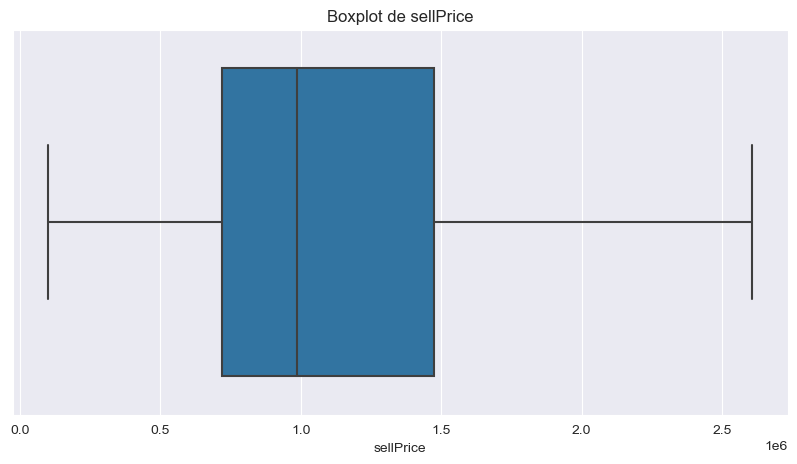

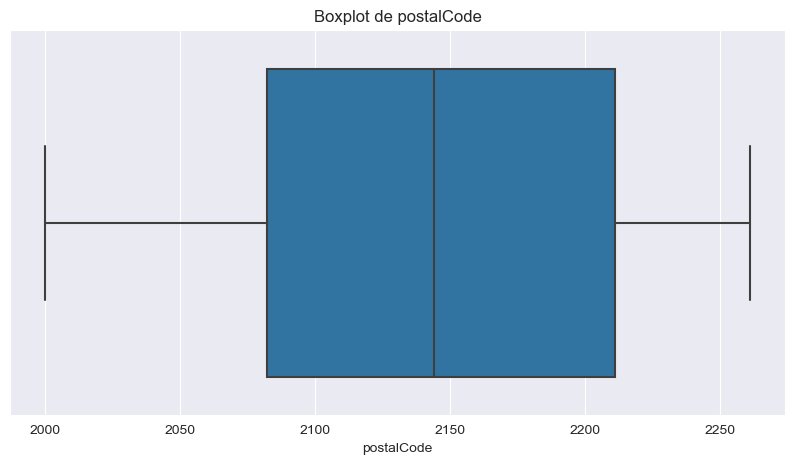

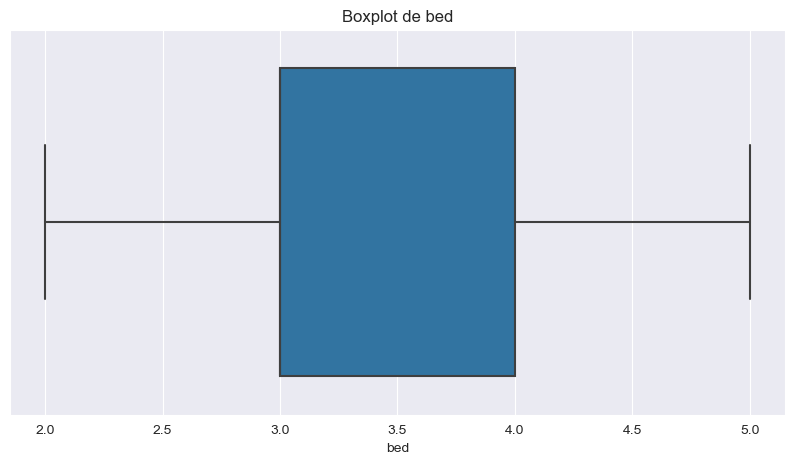

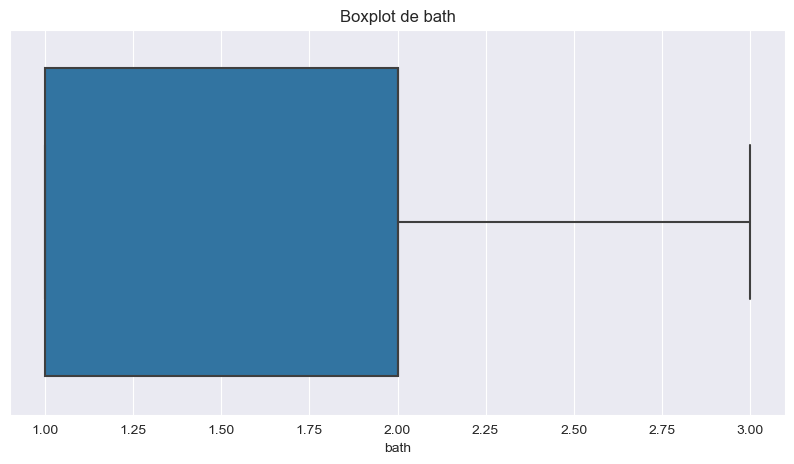

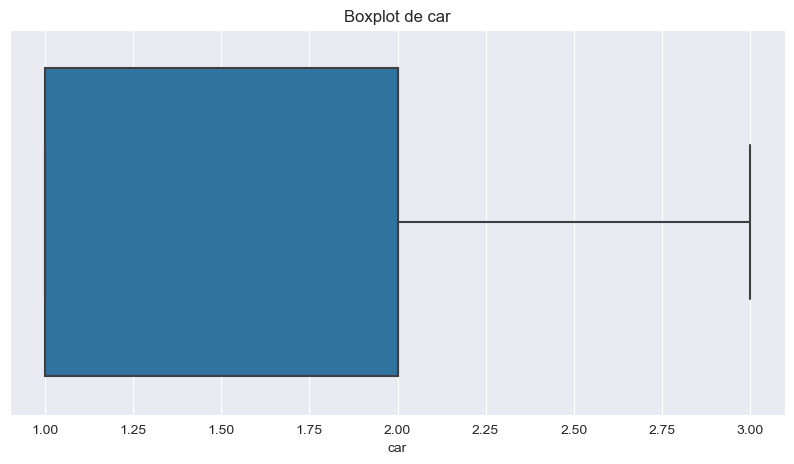

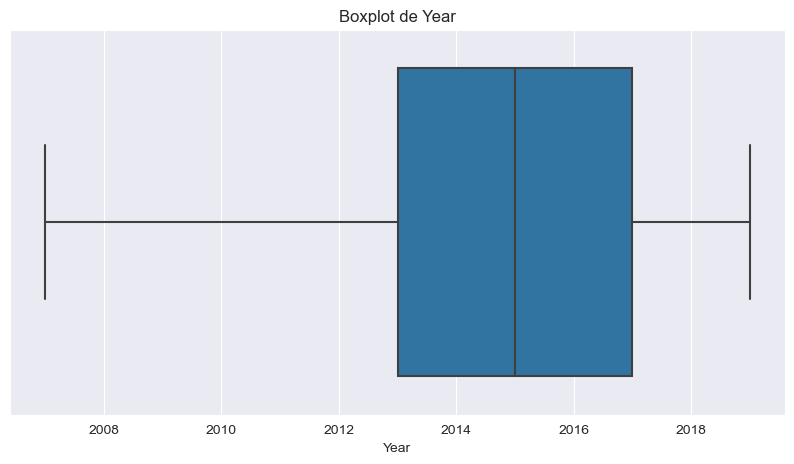

In [32]:
df_numeric = df_viviendas.select_dtypes(include=[np.number, bool])
numeric_list = list(df_numeric.columns)

sns.set_style("darkgrid")

for col in numeric_list:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_viviendas[col], showfliers=False)
    plt.title(f'Boxplot de {col}')
    plt.show()

Hacemos un heatmap para ver la correlación entre las variables numéricas.

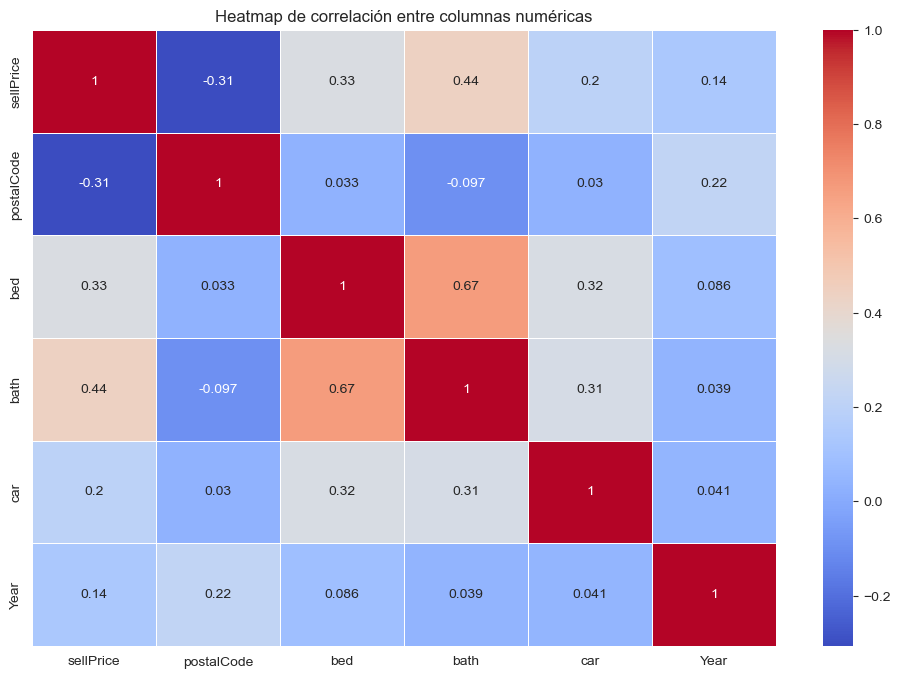

In [33]:
corr_matrix_numerica = df_viviendas[numeric_list].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_numerica, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Heatmap de correlación entre columnas numéricas")
plt.show()

Podemos ver que la mayor correlación con el precio la tiene, en sentido positivo, la columna <b>bath</b>. Y después la columna <b>bed</b>. Mientras que en sentido inverso tenemos la columna <b>postalCode</b>.

Pero además de ver las variables numéricas en boxplot vamos a ver los histogramas de las variables categóricas, para ver la distribución de frecuencias, y lo vamos a "enfrentar" con la variable <b>sellPrice</b>, puesto que es lo que queremos predecir.

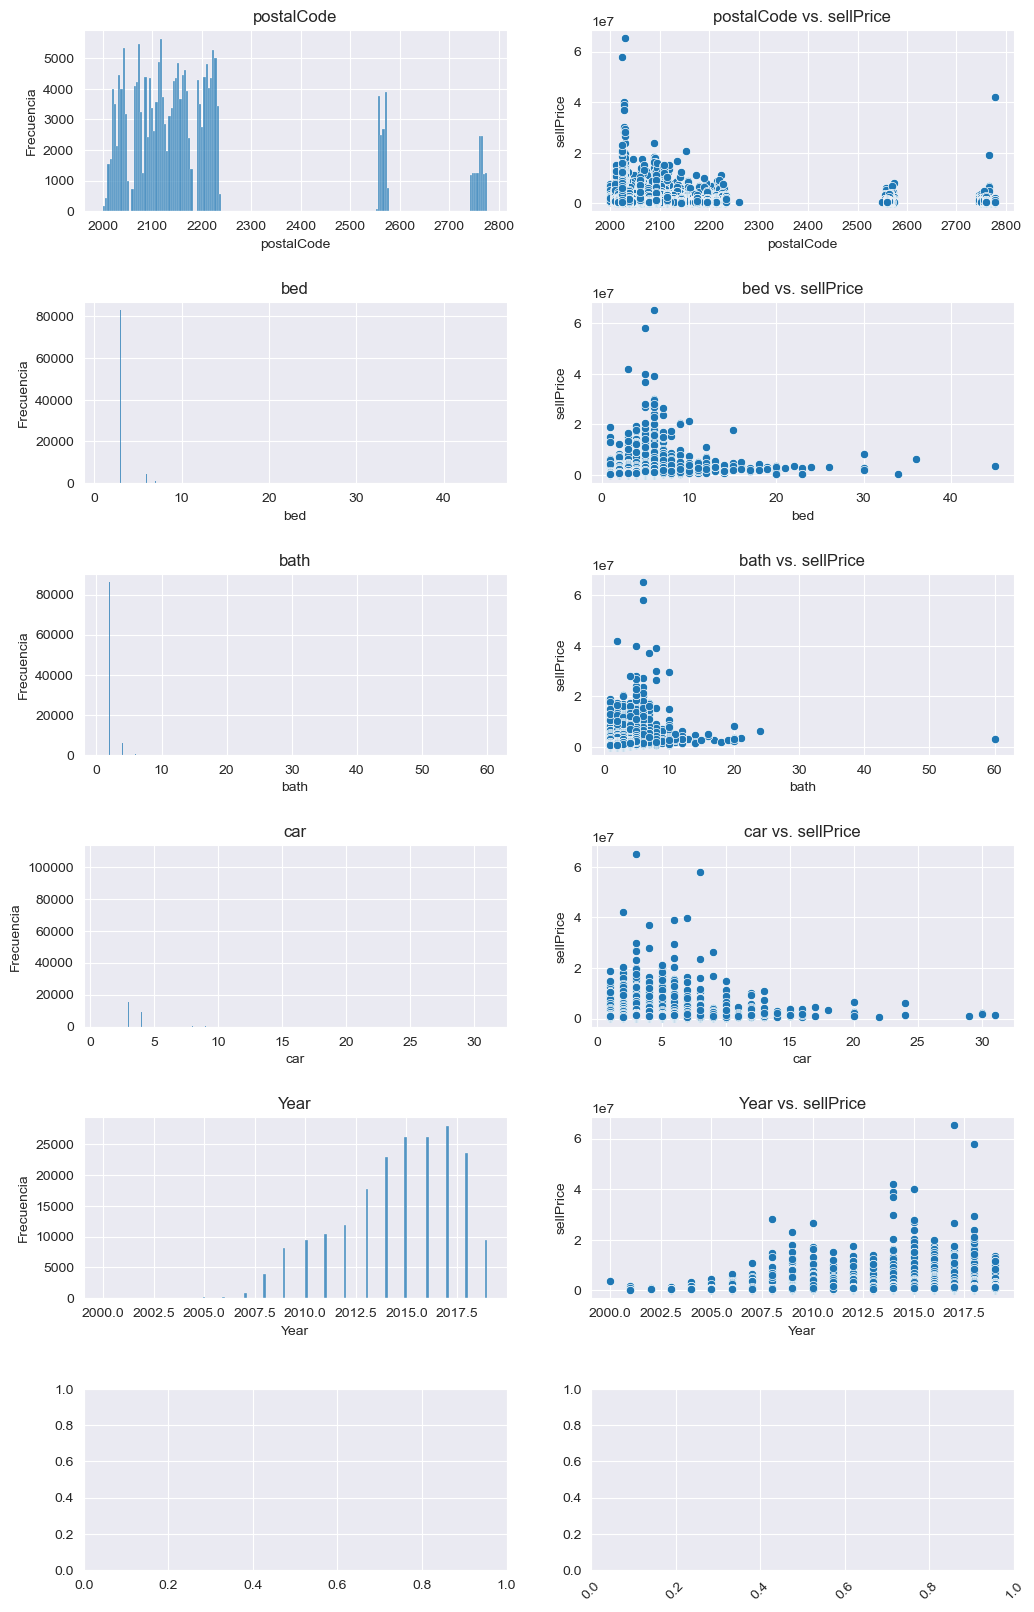

In [34]:
# Creamos subplots para cada variable por separado
num_cols = ['postalCode', 'bed', 'bath', 'car', 'Year']

# Configuramos el tamaño de la figura y el número de filas y columnas de subplots
filas, columnas = 6, 2
fig, axes = plt.subplots(filas, columnas, figsize=(12, 20))
fig.subplots_adjust(hspace=0.5)

# Iterando creamos los gráficos
for i, col in enumerate(num_cols[:6]):
    #Gráfico de cada variable por separado
    sns.histplot(data=df_viviendas, x=col, ax=axes[i, 0])
    axes[i, 0].set_title(f'{col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frecuencia')

    #Gráfico de dispersión cruzando la variable con "sellPrice"
    sns.scatterplot(data=df_viviendas, x=col, y='sellPrice', ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} vs. sellPrice')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('sellPrice')
    plt.xticks(rotation=45)

# Mostrar los gráficos
plt.xticks(rotation=45)
plt.show()

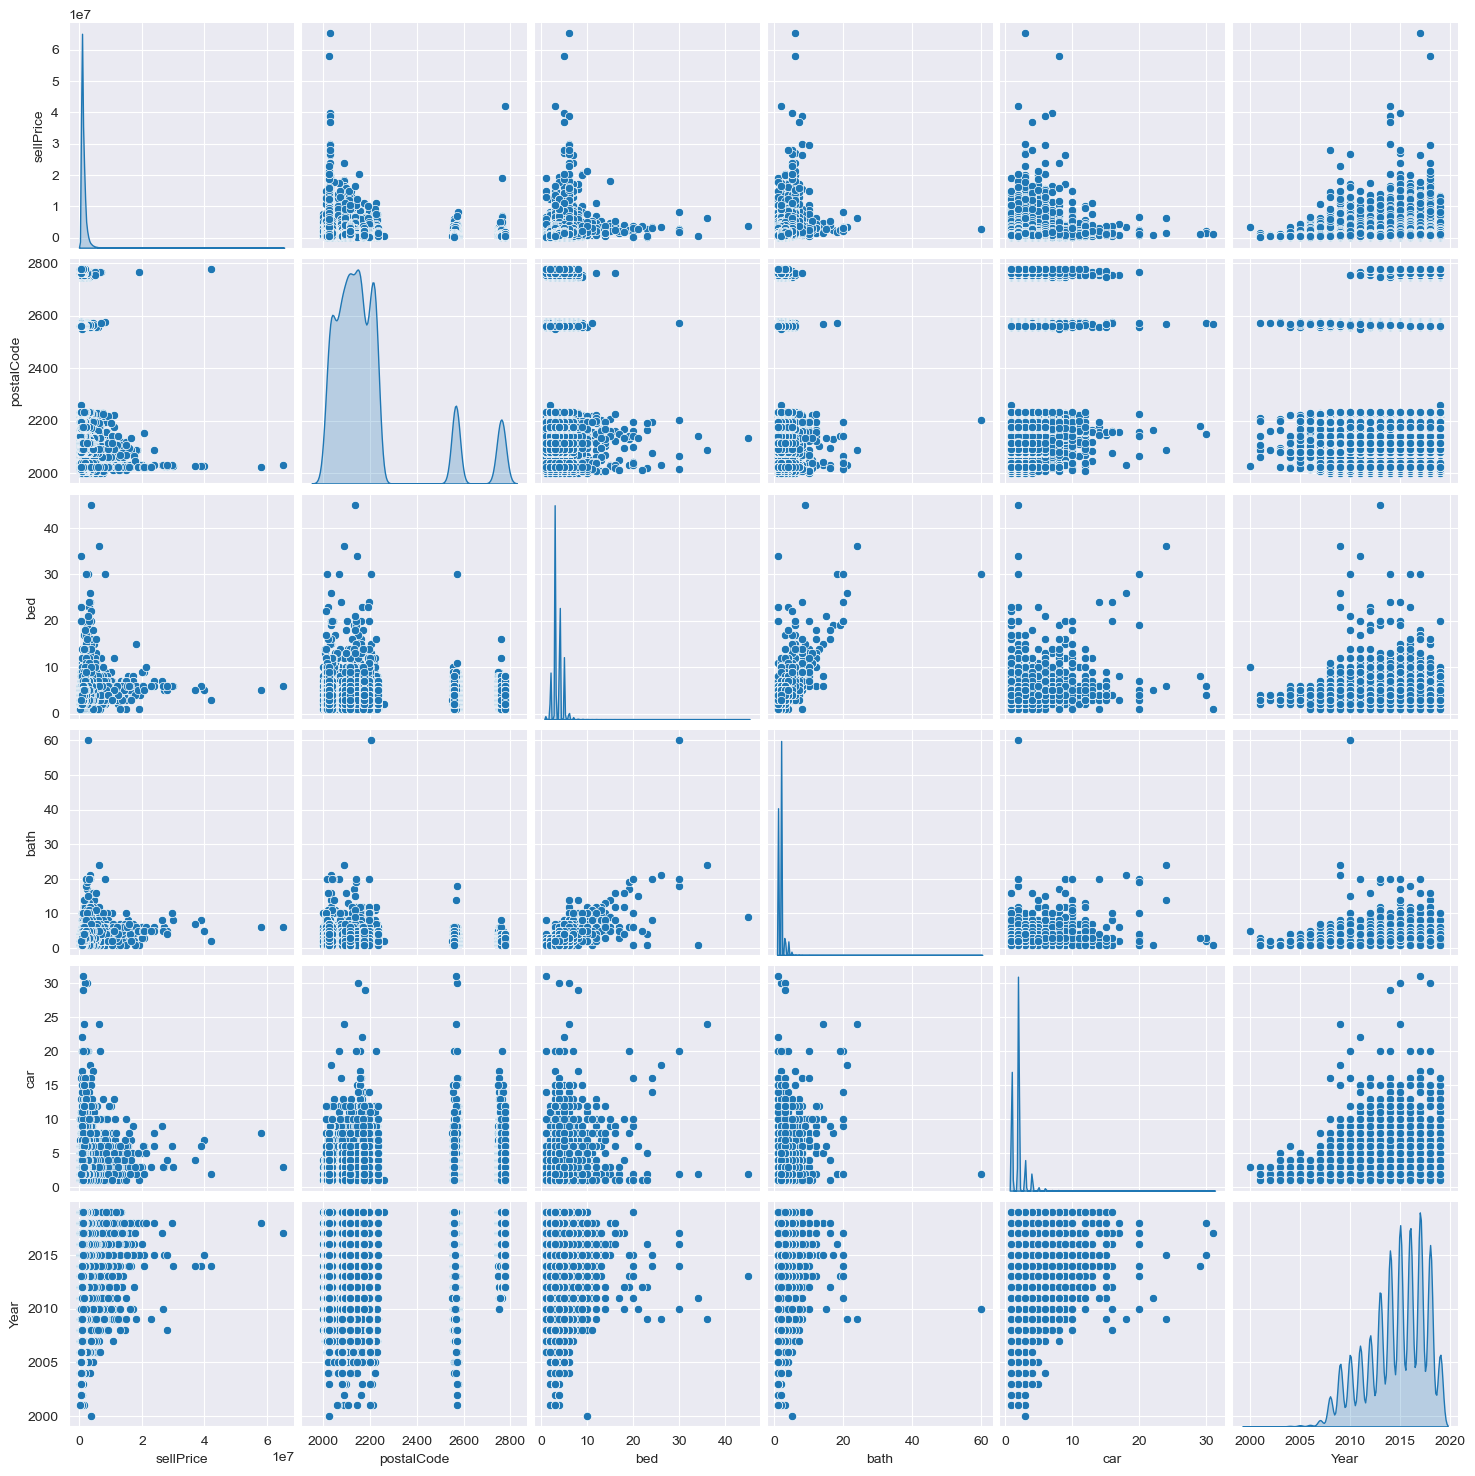

In [35]:
sns.pairplot(df_viviendas, diag_kind='kde')
plt.show()

Tal como habíamos visto en las correlaciones, las que tienen correlación positiva aunque se puede vislumbrar un sentido ascendente en relación al precio, no queda tan claro en algunos casos, y las que tienen correlación negativa, tienen un sentido descendente.

No hay segmentaciones claras entre las numéricas. Veamos qué obtenemos entre las categóricas. Vamos primero con histogramas y después hacemos la representación en relación al precio.

### <font color=#d42f33>Variables categóricas

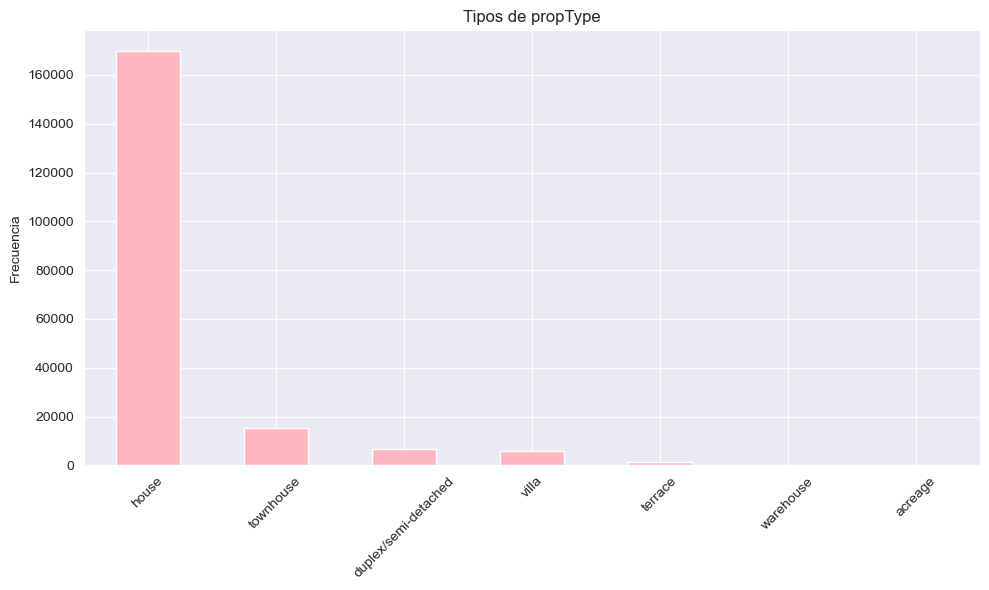

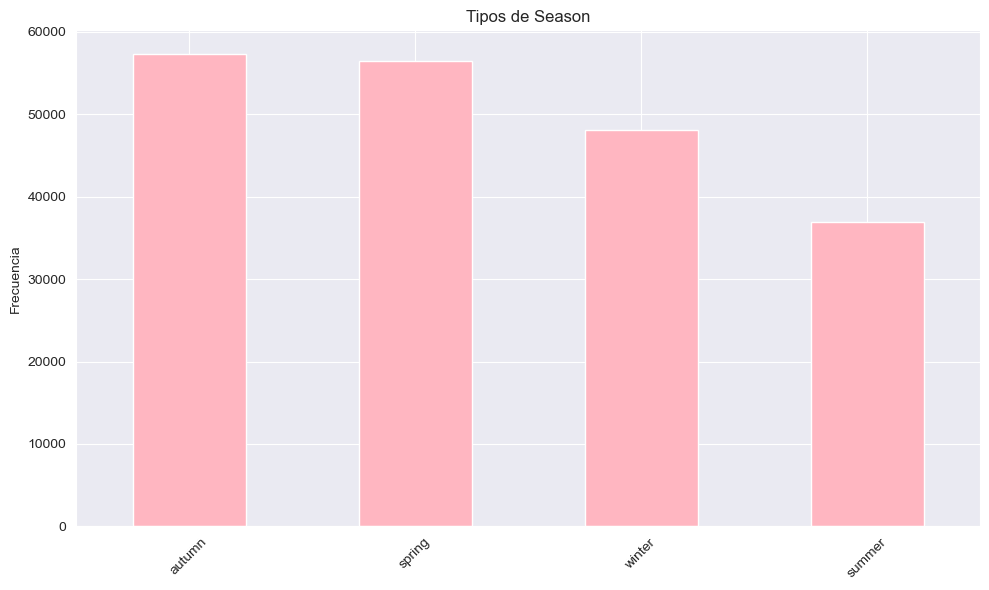

In [36]:
categ_list = ['propType', 'Season']

# Iteramos sobre las columnas categóricas y para crear los histogramas de cada una
for col in categ_list:
    frecuencia_categorias = df_viviendas[col].value_counts()
    
    plt.figure(figsize=(10, 6))
    frecuencia_categorias.plot(kind='bar', color='lightpink')
    
    plt.ylabel('Frecuencia')
    plt.title(f'Tipos de {col}')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

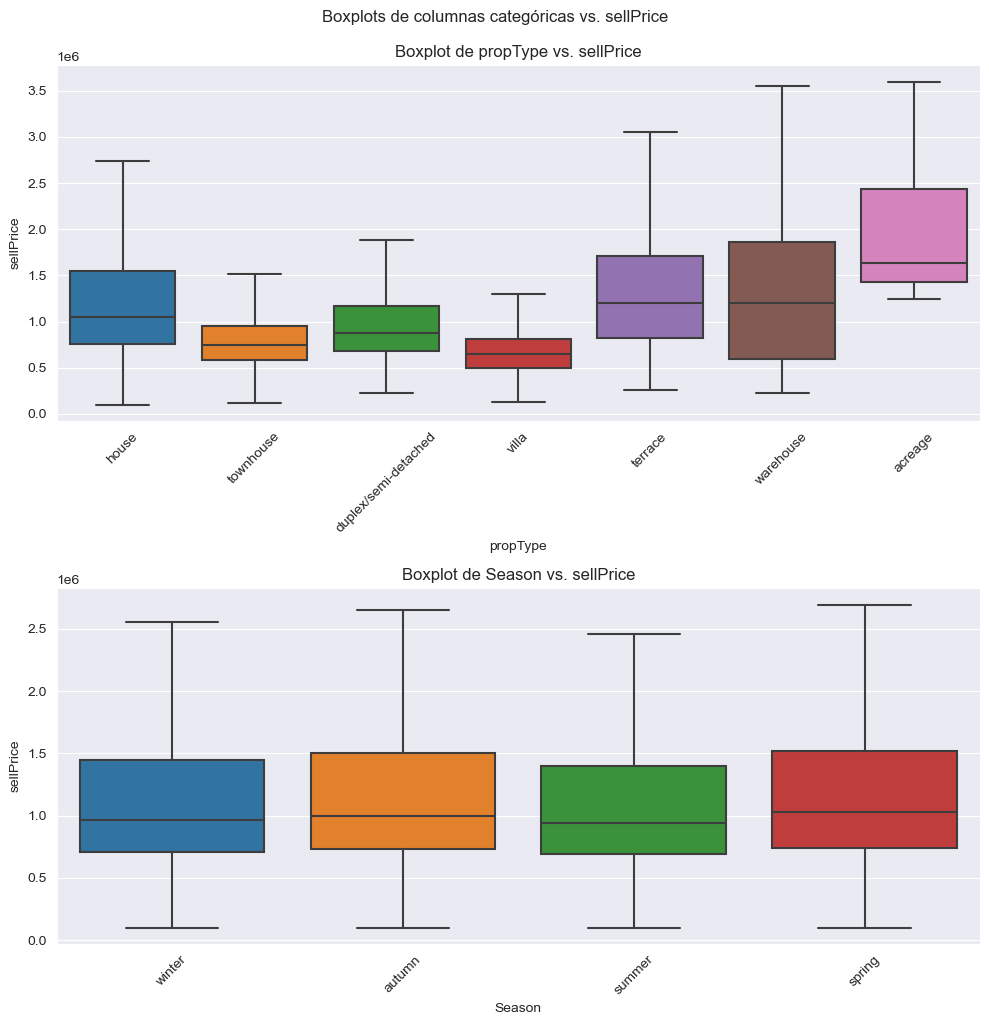

In [37]:
filas, columnas = 2, 1
fig, axs = plt.subplots(filas, columnas, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(categ_list):
    sns.boxplot(data=df_viviendas, x=col, y='sellPrice', ax=axs[i], showfliers=False)
    axs[i].set_title(f'Boxplot de {col} vs. sellPrice')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.suptitle('Boxplots de columnas categóricas vs. sellPrice', y=1.02)
plt.show()

### <font color=#d42f33>Tratamiento de variables categóricas

Con las variables categóricas tenemos un problema a la hora de hacer aprendizaje profundo (deep learning) o machines learning. Necesitamos variables numéricas. Por ello tenemos que trabajar con las variables.

En el caso de la variable <b>propType</b> sí que podemos dar un valor ordinal a la variable, puesto que hemos visto cómo hay variables que tenían mayor valor en función del tipo de propiedad que se tratase. Con la variable <b>Season</b> eso no va a ser posible, puesto que no hay un valor mayor o menos en función de la estación del año que sea.

In [38]:
encoder = OrdinalEncoder(categories=[['villa', 'townhouse', 'duplex/semi-detached', 'house', 'warehouse', 'terrace', 'acreage']])

encoder.fit(df_viviendas[['propType']])
df_viviendas['propType-encoded'] = encoder.transform(df_viviendas[['propType']])

Y ahora hacer los "dummies" para poder trabajar con la variable <b>Season</b> para los modelos de regresión. Lo que hacemos es crear 4 nuevas variables en función del valor categorizado y dar el valor 0 o 1 en función de cuál sea el valor de la variable categórica.

In [39]:
dfv_dum = pd.get_dummies(df_viviendas, columns=['Season'])
dfv_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198704 entries, 0 to 199503
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   sellPrice         198704 non-null  int64         
 1   Date              198704 non-null  datetime64[ns]
 2   propType          198704 non-null  object        
 3   postalCode        198704 non-null  int64         
 4   suburb            198704 non-null  object        
 5   bed               198704 non-null  int64         
 6   bath              198704 non-null  int64         
 7   car               198704 non-null  int64         
 8   Year              198704 non-null  int64         
 9   propType-encoded  198704 non-null  float64       
 10  Season_autumn     198704 non-null  uint8         
 11  Season_spring     198704 non-null  uint8         
 12  Season_summer     198704 non-null  uint8         
 13  Season_winter     198704 non-null  uint8         
dtypes: d

### <font color=#d42f33>Matriz de correlación

Y, por último, vemos cómo queda la matriz de correlación.

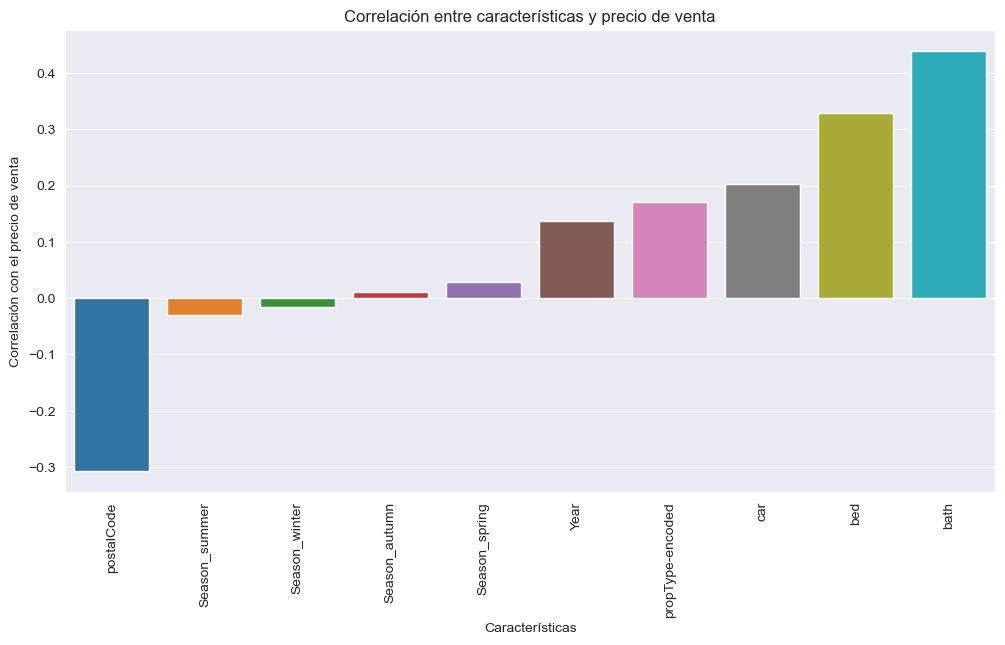

In [40]:
# Filtramos solo las columnas numéricas
dfv_numeric = dfv_dum.select_dtypes(include=[np.number, bool])

# Calculamos la matriz de correlación
corr_matrix = dfv_numeric.corr()

# Filtramos la correlación con la columna "sellPrice" y excluimos la correlación consigo misma
sellPrice_corr = corr_matrix['sellPrice'].sort_values().drop('sellPrice')

plt.figure(figsize=(12, 6))
sns.barplot(x=sellPrice_corr.index, y=sellPrice_corr.values)
plt.xticks(rotation=90)
plt.title("Correlación entre características y precio de venta")
plt.xlabel("Características")
plt.ylabel("Correlación con el precio de venta")
plt.show()

Si agrupamos las variables en cuanto a las características, nos permite ver de otra forma qué variables tienen más peso a la hora de hacer decantar al comprador por una u otra.

De este modo vemos que el código postal es una variable que tiene un peso negativo, meintras que los cuartos de baño tiene más influencia que las habitaciones.

Respecto al tiempo, si bien el año es una variable que influye positivamente ("la inversión en vivienda nunca baja"), la época del año no parece que tenga mucha influencia.

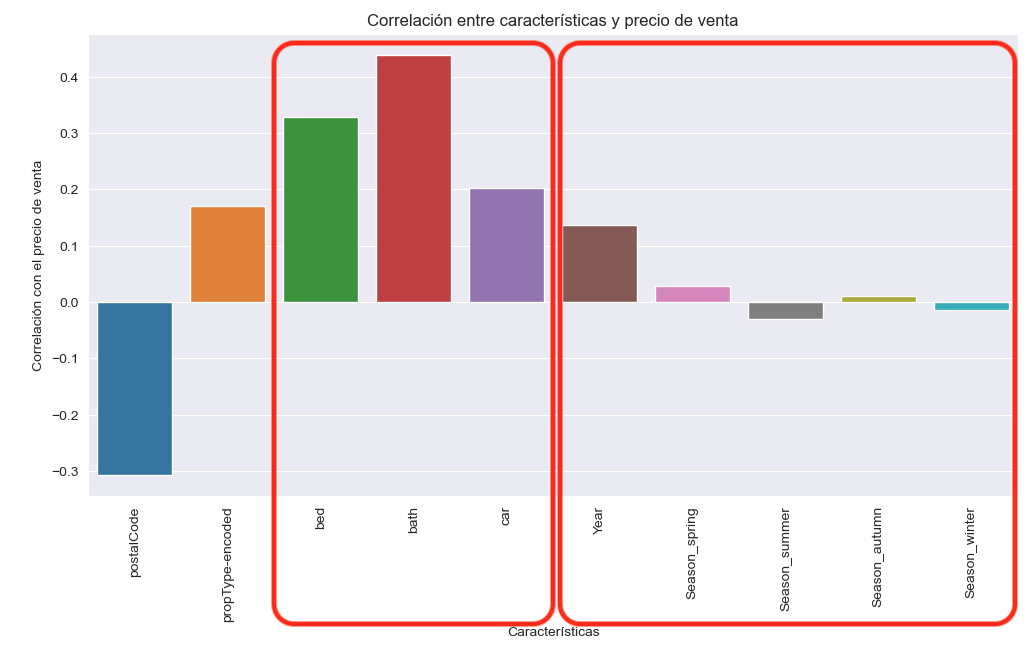

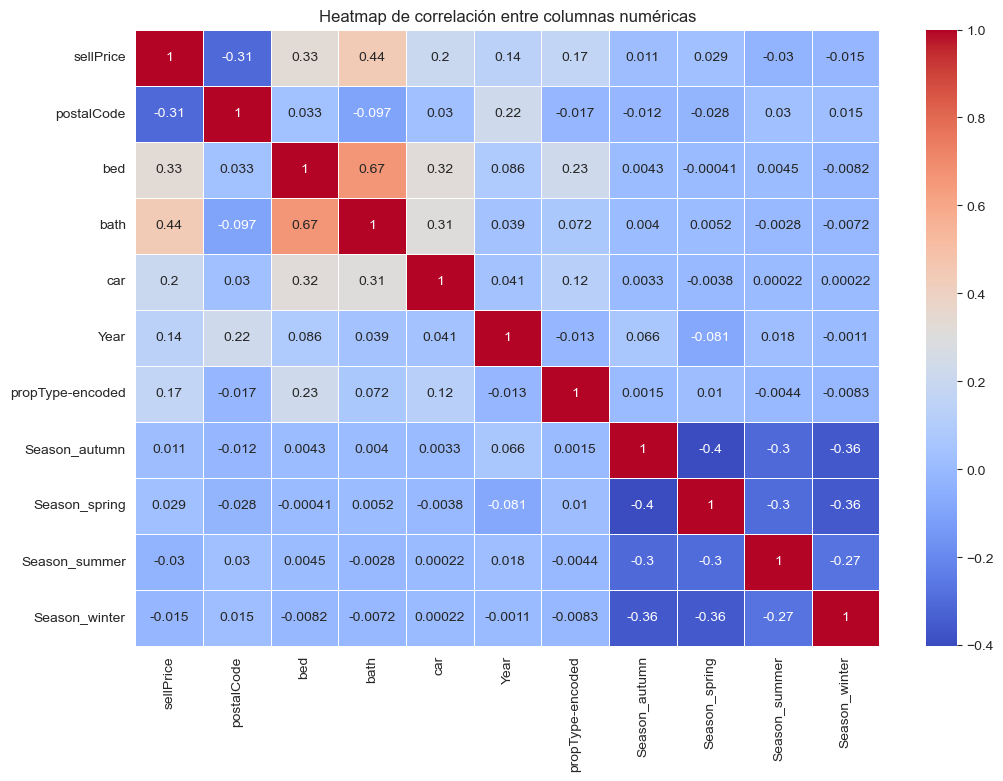

In [41]:
corr_matrix_num = dfv_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_num, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Heatmap de correlación entre columnas numéricas")
plt.show()

In [42]:
ruta_csv = 'Archivos_proyecto/Sydney_cd.csv'
dfv_dum.to_csv(ruta_csv, index=False)

### <font color=#d42f33>Normalización del dataframe

In [43]:
# Separamos las variables numéricas
df_numeric = dfv_dum.select_dtypes(include=['number'])

# Aplicamos el algoritmo de normalización
standard_scaler = StandardScaler()
dfv_normalized = pd.DataFrame(standard_scaler.fit_transform(df_numeric), columns=df_numeric.columns)
dfv_normalized

,sellPrice,postalCode,bed,bath,car,Year,propType-encoded,Season_autumn,Season_spring,Season_summer,Season_winter
0,-0.036433,-0.463475,0.465493,0.122427,0.061638,1.527223,0.345619,-0.636578,-0.629902,-0.477756,1.771132
1,1.040879,-0.463475,0.465493,1.236446,2.048768,1.527223,0.345619,-0.636578,-0.629902,-0.477756,1.771132
2,1.734918,-0.463475,-0.497478,1.236446,0.061638,1.527223,0.345619,-0.636578,-0.629902,-0.477756,1.771132
3,0.295047,-0.463475,-0.497478,-0.991591,0.061638,1.527223,0.345619,1.570899,-0.629902,-0.477756,-0.564611
4,6.997177,-0.463475,1.428464,2.350465,2.048768,1.527223,0.345619,1.570899,-0.629902,-0.477756,-0.564611
...,...,...,...,...,...,...,...,...,...,...,...
198699,0.678322,0.197222,1.428464,1.236446,5.029462,-0.207666,0.345619,-0.636578,-0.629902,-0.477756,1.771132
198700,-0.274685,0.197222,0.465493,1.236446,0.061638,-0.207666,0.345619,1.570899,-0.629902,-0.477756,-0.564611
198701,-0.409349,0.197222,0.465493,0.122427,0.061638,-0.207666,0.345619,1.570899,-0.629902,-0.477756,-0.564611
198702,-0.626884,0.197222,-0.497478,0.122427,0.061638,-0.554643,-2.334732,-0.636578,1.587549,-0.477756,-0.564611


### <font color=#d42f33>Detección y eliminación de outliers

Si bien en la fase de limpieza de los datos ya hemos eliminado unos pocos que se salían claramente de lo esperable, no hemos terminado de identificar todos los posibles valores que se pueden identificar como outliers. Para ello, entonces, vamos a utilizar 2 métodos, para ver cuál es el que es más robusto y los hace mejor, que son <b>Isolation Forest</b> y <b>Local Outlier Factor</b>. El primero está basado en el <b>algoritmo Random Forest</b>. El segundo lo está en el <b>algoritmo KNN</b>.

Como no sabemos qué modelo para detectar outliers nos va a resultar mejor, vamos a testar los dos.

#### <font color=#f0ba19>Modelo con Local Outlier Factor

In [44]:
# Copiamos el dataframe original
dfv_LOF = dfv_dum.copy()

# Creamos un modelo LOF (para los outliers); el modelo sugiere utilizar como estándar 20 vecinos
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

# Ajustamos el modelo LOF a los datos
outlier_scoresLOF = lof.fit_predict(dfv_normalized)

# Añadimos los scores LOF resultantes al dataframe original
dfv_LOF['lof_score'] = outlier_scoresLOF

In [45]:
# Filtramos las filas que no son valores outliers
dfv_LOF = dfv_LOF[dfv_LOF['lof_score'] != -1]

# Eliminamos la columna "lof_score"
dfv_LOF = dfv_LOF.drop(columns=['lof_score'])

dfv_LOF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188768 entries, 0 to 199503
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   sellPrice         188768 non-null  int64         
 1   Date              188768 non-null  datetime64[ns]
 2   propType          188768 non-null  object        
 3   postalCode        188768 non-null  int64         
 4   suburb            188768 non-null  object        
 5   bed               188768 non-null  int64         
 6   bath              188768 non-null  int64         
 7   car               188768 non-null  int64         
 8   Year              188768 non-null  int64         
 9   propType-encoded  188768 non-null  float64       
 10  Season_autumn     188768 non-null  uint8         
 11  Season_spring     188768 non-null  uint8         
 12  Season_summer     188768 non-null  uint8         
 13  Season_winter     188768 non-null  uint8         
dtypes: d

Lo exportamos a un CSV para por si hay que trabajar luego la red neuronal.

In [46]:
dfv_LOF.to_csv('Archivos_proyecto/dfv_LOF.csv', index = False)

#### <font color=#f0ba19>Modelo con Isolation Forest

In [47]:
#Copiamos el dataframe original
dfv_IF = dfv_dum.copy()

# Creamos un modelo IF (para los outliers); el modelo sugiere utilizar como estándar 100 estimadores
iforest = IsolationForest(n_estimators = 100, contamination = 'auto')

# Ajustamos el modelo LOF a los datos
outlier_scoresIF = iforest.fit_predict(dfv_normalized)

# Añadimos los scores LOF resultantes al dataframe original
dfv_IF['if_score'] = outlier_scoresIF

# Filtramos las filas con etiqueta -1 (valores atípicos)
valores_atipicosIF = dfv_IF[dfv_IF['if_score'] == -1]

In [48]:
# Filtramos las filas que no son valores outliers
dfv_IF = dfv_IF[dfv_IF['if_score'] != -1]

# Eliminamos la columna "lof_label"
dfv_IF = dfv_IF.drop(columns=['if_score'])

dfv_IF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160051 entries, 0 to 199502
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   sellPrice         160051 non-null  int64         
 1   Date              160051 non-null  datetime64[ns]
 2   propType          160051 non-null  object        
 3   postalCode        160051 non-null  int64         
 4   suburb            160051 non-null  object        
 5   bed               160051 non-null  int64         
 6   bath              160051 non-null  int64         
 7   car               160051 non-null  int64         
 8   Year              160051 non-null  int64         
 9   propType-encoded  160051 non-null  float64       
 10  Season_autumn     160051 non-null  uint8         
 11  Season_spring     160051 non-null  uint8         
 12  Season_summer     160051 non-null  uint8         
 13  Season_winter     160051 non-null  uint8         
dtypes: d

Lo exportamos a un CSV para por si hay que trabajar luego la red neuronal.

In [49]:
dfv_IF.to_csv('Archivos_proyecto/dfv_IF.csv', index = False)

## <font color=#252973>5. Visualización de Sídney</font><a name="sidney">

Para poder entender mejor todas estas cifras, vamos a visualizarlo sobre un mapa de Sídney. Para ello vamos a poner el <b>precio medio por tipo de vivienda</b> en cada <b>código postal</b>, que es la "unidad menor" que tenemos para la visualización.

In [50]:
# Configuramos la localización para formatear los precios
locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')
locale.setlocale(locale.LC_MONETARY, 'en_AU.UTF-8')

# Identificamos las coordenadas de Sídney para crear el mapa
sydney_coords = [-33.8688, 151.2093]

# Creamos el mapa
Sidney = folium.Map(location=sydney_coords, zoom_start=11)
Sidney

Creamos diccionarios para almacenar la información que vamos a necesitar.

In [51]:
# Para asignar un color a cada tipo de vivienda
color_dict = {
    'house': 'lightblue',
    'townhouse': 'pink',
    'duplex/semi-detached': 'blue',
    'villa': 'darkgreen',
    'terrace': 'red',
    'warehouse': 'green',
    'acreage': 'black'
}

# Para realizar un seguimiento de los tipos de vivienda ya mostrados
tipo_vivienda_mostrado = {}

# Para calcular el precio medio por tipo de vivienda y código postal
precio_medio_dict = {}

In [52]:
# Importamos los datos de los códigos postales con las coordenadas GPS desde el archivo CSV
datos_Sidney = []
with open('Archivos_proyecto/SidneyCP.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        datos_Sidney.append(tuple(map(float, row)))

In [53]:
for item in datos_Sidney:
    codigo_postal = item[0]
    tipos_viviendas = df_viviendas[df_viviendas['postalCode'] == codigo_postal]['propType'].tolist()
    precios = df_viviendas[df_viviendas['postalCode'] == codigo_postal]['sellPrice']
    
    # Calculamos el precio medio por tipo de vivienda
    precio_medio_por_tipo = precios.groupby(tipos_viviendas).mean().round(0).astype(int)
    precio_medio_dict[codigo_postal] = precio_medio_por_tipo
    
    # Creamos un objeto FeatureGroup para agrupar los marcadores por cada código postal
    code_group = folium.FeatureGroup(name=str(codigo_postal))
    
    # Agregamos el precio medio al texto del marcador
    popup_text = f'CP: <strong>{codigo_postal}</strong><br>'
    
    # Iteramos por los tipos de vivienda en esta ubicación
    for tipo_vivienda in tipos_viviendas:
        # Verificamos si ya hemos mostrado un marcador para este tipo de vivienda en este código postal
        if tipo_vivienda not in tipo_vivienda_mostrado.get(codigo_postal, []):
            # Damos formato al texto en el popup
            tipo_color = color_dict.get(tipo_vivienda, 'blue')
            popup_text += f'<span style="color: {tipo_color}">{tipo_vivienda}:</span> '
            precio_medio = precio_medio_por_tipo.get(tipo_vivienda, 0)
            precio_formateado = locale.currency(precio_medio, grouping=True, symbol=True, international=False)
            popup_text += f'{precio_formateado}<br>'
            
            tipo_vivienda_mostrado.setdefault(codigo_postal, []).append(tipo_vivienda)
    
    # Definimos un color predeterminado en caso de que tipos_viviendas esté vacío
    icon_color = color_dict.get('blue')
    
    # Verificamos si tipos_viviendas no está vacío y actualizamos el color del icono
    if tipos_viviendas:
        icon_color = color_dict.get(tipos_viviendas[0], 'blue')
    
    # Agregamos un marcador al grupo con el color correspondiente
    folium.Marker(
        location=[item[1], item[2]],
        popup=popup_text,
        icon=folium.Icon(color=icon_color)
    ).add_to(code_group)
    
    # Agregamos el grupo de códigos postales al mapa
    code_group.add_to(Sidney)

# Mostramos el mapa
Sidney.save("Archivos_proyecto/sydney_map_with_housing_types_and_prices.html")

Sidney

In [54]:
webbrowser.open("Archivos_proyecto/sydney_map_with_housing_types_and_prices.html")

True

## <font color=#252973>6. Exploración y selección de modelos</font><a name="modelos">

### <font color=#d42f33>División del dataframe

Vamos a dividir el dataframe en los conjuntos de entrenamiento y prueba y posterior validación. Vamos a separar los datos en 3. El 85% para entrenar y testear. Y del 85%, el 20% para testear.

#### <font color=#f0ba19>Modelo con Local Outlier Factor

In [55]:
# Dividimos los datos en entrenamiento/prueba (85%) y validación (15%)
train_test_dataLOF, valid_dataLOF = train_test_split(dfv_LOF, test_size=0.15, random_state=42)

# Dividimos los datos en entrenamiento (80%) y prueba (20%)
train_dataLOF, test_dataLOF = train_test_split(train_test_dataLOF, test_size=0.20, random_state=42)

# Eliminamos las columnas 'suburb', 'Date' y 'propoType' mientras guardamos 'sellPrice' como variable objetivo
# Para el conjunto de entrenamiento
X_trainLOF = train_dataLOF.drop(['sellPrice', 'suburb', 'Date', 'propType'], axis=1)
y_trainLOF = train_dataLOF['sellPrice']

# Para el conjunto de prueba
X_testLOF = test_dataLOF.drop(['sellPrice', 'suburb', 'Date', 'propType'], axis=1)
y_testLOF = test_dataLOF['sellPrice']

# Para el conjunto de validación
X_validLOF = valid_dataLOF.drop(['sellPrice', 'suburb', 'Date', 'propType'], axis=1)
y_validLOF = valid_dataLOF['sellPrice']

# Mostramos las dimensiones de cada conjunto
print(f"Train data shape: {X_trainLOF.shape}")
print(f"Test data shape: {X_testLOF.shape}")
print(f"Validation data shape: {X_validLOF.shape}")

Train data shape: (128361, 10)
Test data shape: (32091, 10)
Validation data shape: (28316, 10)


#### <font color=#f0ba19>Modelo con Isolation Forest

In [56]:
# Dividimos los datos en entrenamiento/prueba (85%) y validación (15%)
train_test_dataIF, valid_dataIF = train_test_split(dfv_IF, test_size=0.15, random_state=42)

# Dividimos los datos en entrenamiento (80%) y prueba (20%)
train_dataIF, test_dataIF = train_test_split(train_test_dataIF, test_size=0.20, random_state=42)

# Eliminamos las columnas 'suburb', 'Date' y 'propoType' mientras guardamos 'sellPrice' como variable objetivo
# Para el conjunto de entrenamiento
X_trainIF = train_dataIF.drop(['sellPrice', 'suburb', 'Date', 'propType'], axis=1)
y_trainIF = train_dataIF['sellPrice']

# Para el conjunto de prueba
X_testIF = test_dataIF.drop(['sellPrice', 'suburb', 'Date', 'propType'], axis=1)
y_testIF = test_dataIF['sellPrice']

# Para el conjunto de validación
X_validIF = valid_dataIF.drop(['sellPrice', 'suburb', 'Date', 'propType'], axis=1)
y_validIF = valid_dataIF['sellPrice']

# Mostramos las dimensiones de cada conjunto
print(f"Train data shape: {X_trainIF.shape}")
print(f"Test data shape: {X_testIF.shape}")
print(f"Validation data shape: {X_validIF.shape}")

Train data shape: (108834, 10)
Test data shape: (27209, 10)
Validation data shape: (24008, 10)


### <font color=#d42f33>Modelos de regresión

#### <font color=#f0ba19>Definición de modelos

In [57]:
# Función para evaluar un modelo    
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    return r2, mse, rmse, mae

Creamos una lista de modelos, porque queremos ver cuál de los distintos que hay es el que mejor se ajusta a nuestro conjunto de datos. Y vamos a comprobar cómo van con los  dos modelos que hemos utilizado para identificar los outliers.

In [58]:
# Lista de modelos
categorical_column = [5]

modelos = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(alpha=1.0)),
    ('Lasso Regression', Lasso(alpha=1.0)),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('K-Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('XGBoost Regression', XGBRegressor(categorical_features=categorical_column)),
    ('HistGradient Boosting Regression', HistGradientBoostingRegressor(categorical_features=categorical_column))
]

#### <font color=#f0ba19>Entrenamiento de modelos bajo Local Outlier Factor

In [59]:
standard_scaler = StandardScaler()
X_train_standardLOF = standard_scaler.fit_transform(X_trainLOF)
X_test_standardLOF = standard_scaler.transform(X_testLOF)

In [60]:
%%time

# Entrenamos y evaluamos cada modelo
for m, modeloLOF in modelos:
    print(f"Probando modelo {m}")
    modeloLOF.fit(X_train_standardLOF, y_trainLOF)

# Evaluamos los modelos y almacenamos los resultados
resultsLOF = {}
for nombre, modeloLOF in modelos:
    r2, mse, rmse, mae = evaluate_model(modeloLOF, X_test_standardLOF, y_testLOF)
    resultsLOF[nombre] = {"R^2": r2, "MSE": mse, "RMSE": rmse, "MAE": mae}

# Creamos un dataframe con los resultados
df_LOF = pd.DataFrame(resultsLOF).T

df_LOF

Probando modelo Linear Regression
Probando modelo Ridge Regression
Probando modelo Lasso Regression
Probando modelo Decision Tree Regression
Probando modelo Random Forest Regression
Probando modelo Gradient Boosting Regression
Probando modelo K-Neighbors Regression
Probando modelo Neural Network Regression
Probando modelo XGBoost Regression
Probando modelo HistGradient Boosting Regression
CPU times: user 8min 11s, sys: 1min 26s, total: 9min 37s
Wall time: 3min 14s


,R^2,MSE,RMSE,MAE
Linear Regression,0.354136,5.466358e+11,739348.219538,432313.210932
Ridge Regression,0.354136,5.466358e+11,739348.208813,432312.447279
Lasso Regression,0.354136,5.466357e+11,739348.189397,432312.836590
Decision Tree Regression,0.419601,4.912290e+11,700877.285234,296083.042989
Random Forest Regression,0.629022,3.139823e+11,560341.191904,248923.347214
Gradient Boosting Regression,0.635526,3.084776e+11,555407.615109,273777.953061
K-Neighbors Regression,0.497173,4.255744e+11,652360.671486,308784.213748
Neural Network Regression,0.390289,5.160373e+11,718357.368865,421213.757592
XGBoost Regression,0.685683,2.660262e+11,515777.245963,226917.412763
HistGradient Boosting Regression,0.693624,2.593057e+11,509220.701263,236263.635775


In [61]:
df_LOF["MAE"].sort_values()

XGBoost Regression                  226917.412763
HistGradient Boosting Regression    236263.635775
Random Forest Regression            248923.347214
Gradient Boosting Regression        273777.953061
Decision Tree Regression            296083.042989
K-Neighbors Regression              308784.213748
Neural Network Regression           421213.757592
Ridge Regression                    432312.447279
Lasso Regression                    432312.836590
Linear Regression                   432313.210932
Name: MAE, dtype: float64

#### <font color=#f0ba19>Entrenamiento de modelos bajo Isolation Forest

In [62]:
standard_scaler = StandardScaler()
X_train_standardIF = standard_scaler.fit_transform(X_trainIF)
X_test_standardIF = standard_scaler.transform(X_testIF)

In [63]:
%%time

# Entrenamos y evaluamos cada modelo
for m, modeloIF in modelos:
    print(f"Probando modelo {m}")
    modeloIF.fit(X_train_standardIF, y_trainIF)

# Evaluamos los modelos y almacenamos los resultados
resultsIF = {}
for nombre, modeloIF in modelos:
    r2, mse, rmse, mae = evaluate_model(modeloIF, X_test_standardIF, y_testIF)
    resultsIF[nombre] = {"R^2": r2, "MSE": mse, "RMSE": rmse, "MAE": mae}

# Creamos un dataframe con los resultados
df_IF = pd.DataFrame(resultsIF).T

df_IF

Probando modelo Linear Regression
Probando modelo Ridge Regression
Probando modelo Lasso Regression
Probando modelo Decision Tree Regression
Probando modelo Random Forest Regression
Probando modelo Gradient Boosting Regression
Probando modelo K-Neighbors Regression
Probando modelo Neural Network Regression
Probando modelo XGBoost Regression
Probando modelo HistGradient Boosting Regression
CPU times: user 6min 47s, sys: 1min 9s, total: 7min 57s
Wall time: 2min 44s


,R^2,MSE,RMSE,MAE
Linear Regression,0.371291,2.278613e+11,477348.195953,349390.016769
Ridge Regression,0.371389,2.278259e+11,477311.096690,349295.409196
Lasso Regression,0.371389,2.278259e+11,477311.123590,349295.551377
Decision Tree Regression,0.598074,1.456689e+11,381665.893723,238738.391191
Random Forest Regression,0.710279,1.050027e+11,324041.228582,206184.639555
Gradient Boosting Regression,0.690248,1.122624e+11,335055.833209,225540.124886
K-Neighbors Regression,0.618352,1.383196e+11,371913.448693,246807.828542
Neural Network Regression,0.365175,2.300777e+11,479664.184672,356191.550454
XGBoost Regression,0.770923,8.302373e+10,288138.390061,184304.677280
HistGradient Boosting Regression,0.758581,8.749689e+10,295798.724742,192151.682010


In [64]:
df_IF["MAE"].sort_values()

XGBoost Regression                  184304.677280
HistGradient Boosting Regression    192151.682010
Random Forest Regression            206184.639555
Gradient Boosting Regression        225540.124886
Decision Tree Regression            238738.391191
K-Neighbors Regression              246807.828542
Ridge Regression                    349295.409196
Lasso Regression                    349295.551377
Linear Regression                   349390.016769
Neural Network Regression           356191.550454
Name: MAE, dtype: float64

#### <font color=#f0ba19>Visualización de los modelos

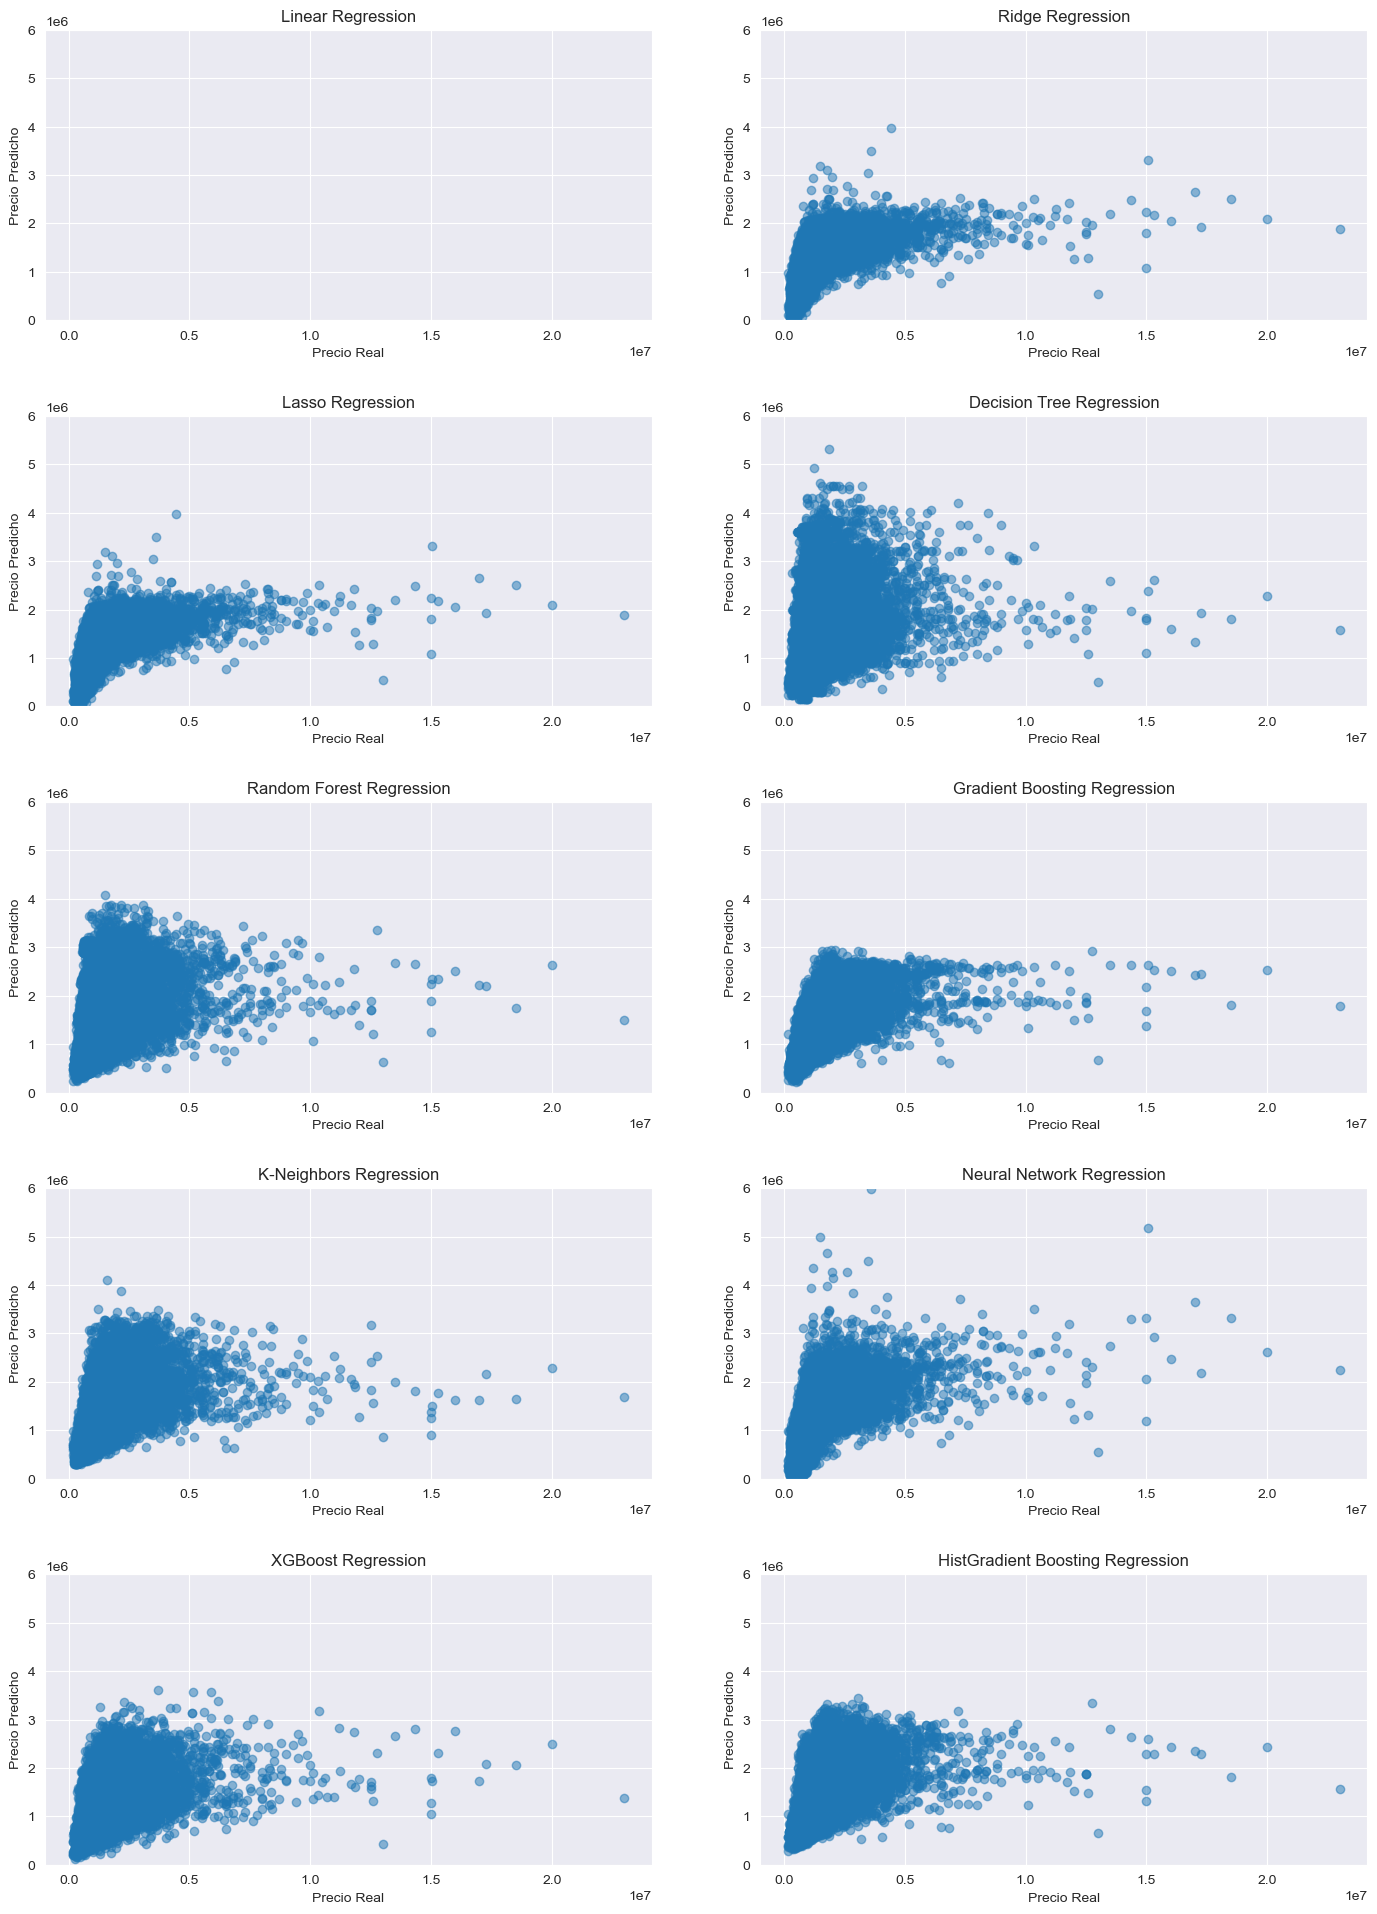

In [65]:
filas, columnas = 5, 2

fig, axs = plt.subplots(filas, columnas, figsize=(10, 25))
fig.tight_layout(pad=5.0)

# Iteramos a través de los modelos y crear un gráfico de dispersión para cada uno
for idx, (nombre, modelo) in enumerate(modelos):
    fila_actual = idx // columnas
    columna_actual = idx % columnas
    ax = axs[fila_actual, columna_actual]

    # Calcular las predicciones del modelo
    y_pred = modelo.predict(X_test_standardLOF)

    # Dibujar el gráfico de dispersión
    ax.scatter(y_testLOF, y_pred, alpha=0.5)
    ax.set_title(nombre)
    ax.set_xlabel('Precio Real')
    ax.set_ylabel('Precio Predicho')
    ax.grid(True)
    ax.set_ylim(0, 6000000)

plt.show()

### <font color=#d42f33>Modelos de redes neuronales

Vamos a trabajar con los datos de <b>Local Outlier Factor</b>.

Para ver qué red neuronal nos funciona mejor, vamos a crear diferentes modelos en función del número de neuronas que vamos a incorporar, del número de capas ocultas, de la función de activación y de diferentes épocas. A su vez, vamos a probar con 2 optimizadores, para ver cuál nos da mejores resultados en total.

Por ello vamos a crear listas de los parámetros a optimizar con los modelos de redes neuronales.

In [66]:
# Creamos listas de configuración de los parámetros
neurons_list = [150, 175, 200]
num_hidden_layers_list = [4, 5, 6]
activation_list = ['relu', 'swish']
epochs_list = [100, 150]

#### <font color=#f0ba19>Optimizador Adam

In [67]:
# Definimos la función para crear los modelos
def create_modelAdam(neurons=10, num_hidden_layers=1, activation='relu', epochs=10):
    model_Adam = Sequential()
    model_Adam.add(Dense(neurons, activation=activation, input_dim=X_train_standardLOF.shape[1]))
    
    for _ in range(num_hidden_layers):
        model_Adam.add(Dense(neurons, activation=activation))
    
    model_Adam.add(Dense(1, activation='linear'))
    model_Adam.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01, clipnorm=1.))
    return model_Adam

Adam_models_data = []

Adam_model_number = 1  # Número de modelo inicial

for neurons in neurons_list:
    for num_hidden_layers in num_hidden_layers_list:
        for activation in activation_list:
            for epochs in epochs_list:
                Adam_model_name = f'model{Adam_model_number}'
                # Creamos el modelo
                model_Adam = create_modelAdam(neurons=neurons, num_hidden_layers=num_hidden_layers, activation=activation, epochs=epochs)
            
                # Agregamos los datos del modelo y sus hiperparámetros a la lista
                Adam_model_data = {'model': Adam_model_name, 'neurons': neurons, 'hidden_layers': num_hidden_layers,
                                   'activation': activation, 'epochs': epochs}
                Adam_models_data.append(Adam_model_data)
            
                # Incrementamos el número de modelo
                Adam_model_number += 1

                 # Verificamos el progreso
                print(f"Modelo {Adam_model_name} creado con {neurons} neuronas, {num_hidden_layers} capas ocultas, función de activación {activation} y {epochs} épocas")

Adam_models_df = pd.DataFrame(Adam_models_data)

# Creamos un dataframe para ver los resultados por modelo
Adam_new_models = {}

for Adam_model_name, model_Adam in Adam_models_df.iterrows():
    neurons = model_Adam['neurons']
    num_hidden_layers = model_Adam['hidden_layers']
    activation = model_Adam['activation']
    epochs = model_Adam['epochs']

    # Modificamos el nombre del modelo para que coincida con el dataframe
    Adam_model_name = model_Adam['model']
    
    # Creamos el modelo con los hiperparámetros y lo agregamos al diccionario
    Adam_new_model = create_modelAdam(neurons=neurons, num_hidden_layers=num_hidden_layers, activation=activation, epochs=epochs)
    Adam_new_models[Adam_model_name] = Adam_new_model

Modelo model1 creado con 150 neuronas, 4 capas ocultas, función de activación relu y 100 épocas
Modelo model2 creado con 150 neuronas, 4 capas ocultas, función de activación relu y 150 épocas
Modelo model3 creado con 150 neuronas, 4 capas ocultas, función de activación swish y 100 épocas
Modelo model4 creado con 150 neuronas, 4 capas ocultas, función de activación swish y 150 épocas
Modelo model5 creado con 150 neuronas, 5 capas ocultas, función de activación relu y 100 épocas
Modelo model6 creado con 150 neuronas, 5 capas ocultas, función de activación relu y 150 épocas
Modelo model7 creado con 150 neuronas, 5 capas ocultas, función de activación swish y 100 épocas
Modelo model8 creado con 150 neuronas, 5 capas ocultas, función de activación swish y 150 épocas
Modelo model9 creado con 150 neuronas, 6 capas ocultas, función de activación relu y 100 épocas
Modelo model10 creado con 150 neuronas, 6 capas ocultas, función de activación relu y 150 épocas
Modelo model11 creado con 150 neuro

In [71]:
%%time

Adam_results = []

for Adam_model_name, model_Adam in Adam_new_models.items():
    estimator = KerasRegressor(build_fn=lambda: model_Adam, batch_size=32, verbose=0)
    estimator.fit(X_train_standardLOF, y_trainLOF)
    
    # Calculamos las métricas R^2, MAE, MSE y RMSE
    y_pred_Adam = estimator.predict(X_test_standardLOF)
    r2 = r2_score(y_testLOF, y_pred_Adam)
    mse = mean_squared_error(y_testLOF, y_pred_Adam)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_testLOF, y_pred_Adam)
    
    Adam_results.append({
        'Model': Adam_model_name,
        'R^2': r2,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae
    })

Adam_df = pd.DataFrame(Adam_results, columns=['Model', 'R^2', 'MSE', 'RMSE', 'MAE'])
df_Adam = pd.concat([Adam_models_df, Adam_df], axis=1)
df_Adam

CPU times: user 16min 25s, sys: 1min 45s, total: 18min 10s
Wall time: 8min 59s


,model,neurons,hidden_layers,activation,epochs,Model,R^2,MSE,RMSE,MAE
0,model1,150,4,relu,100,model1,0.495494,4.269958e+11,653449.163743,315730.645531
1,model2,150,4,relu,150,model2,0.456754,4.597836e+11,678073.464068,358321.003095
2,model3,150,4,swish,100,model3,0.501906,4.215689e+11,649283.363488,368229.822824
3,model4,150,4,swish,150,model4,0.525203,4.018513e+11,633917.432198,330058.028115
4,model5,150,5,relu,100,model5,0.430251,4.822146e+11,694416.724556,352602.251759
5,model6,150,5,relu,150,model6,0.495401,4.270745e+11,653509.388382,378561.571133
6,model7,150,5,swish,100,model7,0.514405,4.109900e+11,641085.023410,350156.308233
7,model8,150,5,swish,150,model8,0.460550,4.565711e+11,675700.431312,385396.228857
8,model9,150,6,relu,100,model9,0.483304,4.373128e+11,661296.298069,325798.090793
9,model10,150,6,relu,150,model10,0.485562,4.354017e+11,659849.772287,361365.347028


In [72]:
# De los valores obtenidos incorporamos el que tiene el R^2 más alto al df_LOF.
modelo_mejor_Adam = df_Adam.loc[df_Adam['R^2'].idxmax()]

r2_Adam = modelo_mejor_Adam['R^2']
mse_Adam = modelo_mejor_Adam['MSE']
rmse_Adam = modelo_mejor_Adam['RMSE']
mae_Adam = modelo_mejor_Adam['MAE']
print(r2_Adam)
print(mse_Adam)
print(rmse_Adam)
print(mae_Adam)

0.5314769937051871
396540904833.90234
629714.9393447025
344045.18996564456


In [73]:
Adam_best_model_name = df_Adam.loc[df_Adam['R^2'].idxmax(), 'model']
Adam_best_model = Adam_new_models.get(Adam_best_model_name)
print("Nombre del mejor modelo:", Adam_best_model_name)

Nombre del mejor modelo: model23


In [74]:
%%time
history_Adam = Adam_best_model.fit(
    X_train_standardLOF, y_trainLOF,
    validation_data=(X_test_standardLOF, y_testLOF),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
4012/4012 [==============================] - 17s 4ms/step - loss: 427391713280.0000 - val_loss: 392036450304.0000
Epoch 2/50
4012/4012 [==============================] - 15s 4ms/step - loss: 426220650496.0000 - val_loss: 396587368448.0000
Epoch 3/50
4012/4012 [==============================] - 16s 4ms/step - loss: 433477582848.0000 - val_loss: 412343271424.0000
Epoch 4/50
4012/4012 [==============================] - 16s 4ms/step - loss: 491128520704.0000 - val_loss: 398969536512.0000
Epoch 5/50
4012/4012 [==============================] - 16s 4ms/step - loss: 430923939840.0000 - val_loss: 416970342400.0000
Epoch 6/50
4012/4012 [==============================] - 20s 5ms/step - loss: 428327501824.0000 - val_loss: 399320121344.0000
Epoch 7/50
4012/4012 [==============================] - 16s 4ms/step - loss: 465104928768.0000 - val_loss: 421406408704.0000
Epoch 8/50
4012/4012 [==============================] - 16s 4ms/step - loss: 442230308864.0000 - val_loss: 395985682432.0000


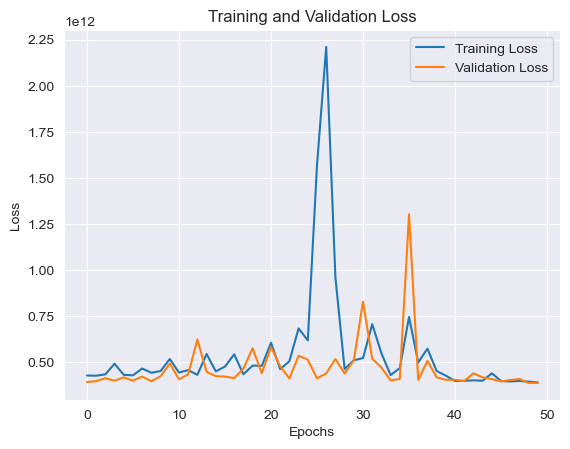

In [75]:
# Mostramos la pérdida
plt.plot(history_Adam.history['loss'], label='Training Loss')
plt.plot(history_Adam.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [76]:
# Creamos una nueva fila de resultados para KerasRegressor
new_row_Adam = pd.DataFrame({
    'R^2': [r2_Adam],
    'MSE': [mse_Adam],
    'RMSE': [rmse_Adam],
    'MAE': [mae_Adam]
}, index=['Keras Regressor 1'])

# Agregamos la nueva fila al dataframe df_results
df_LOF = pd.concat([df_LOF, new_row_Adam])
df_LOF

,R^2,MSE,RMSE,MAE
Linear Regression,0.354136,5.466358e+11,739348.219538,432313.210932
Ridge Regression,0.354136,5.466358e+11,739348.208813,432312.447279
Lasso Regression,0.354136,5.466357e+11,739348.189397,432312.836590
Decision Tree Regression,0.419601,4.912290e+11,700877.285234,296083.042989
Random Forest Regression,0.629022,3.139823e+11,560341.191904,248923.347214
Gradient Boosting Regression,0.635526,3.084776e+11,555407.615109,273777.953061
K-Neighbors Regression,0.497173,4.255744e+11,652360.671486,308784.213748
Neural Network Regression,0.390289,5.160373e+11,718357.368865,421213.757592
XGBoost Regression,0.685683,2.660262e+11,515777.245963,226917.412763
HistGradient Boosting Regression,0.693624,2.593057e+11,509220.701263,236263.635775


#### <font color=#f0ba19>Optimizador SGD

Lo mismo que hemos hecho hasta ahora con el optimizador Adam lo hacemos con el optimizador SGD.

In [77]:
# Definimos la función para crear los modelos
def create_modelSGD(neurons=64, num_hidden_layers=1, activation='relu', epochs=10):
    model_SGD = Sequential()
    model_SGD.add(Dense(neurons, activation=activation, input_dim=X_train_standardLOF.shape[1]))
    
    for _ in range(num_hidden_layers):
        model_SGD.add(Dense(neurons, activation=activation))
    
    model_SGD.add(Dense(1, activation='linear'))
    model_SGD.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01, clipnorm=1.))
    return model_SGD

SGD_models_data = []

SGD_model_number = 1  # Número de modelo inicial

for neurons in neurons_list:
    for num_hidden_layers in num_hidden_layers_list:
        for activation in activation_list:
            for epochs in epochs_list:
                SGD_model_name = f'model{SGD_model_number}'
                
                # Creamos el modelo
                model_SGD = create_modelSGD(neurons=neurons, num_hidden_layers=num_hidden_layers, activation=activation, epochs=epochs)
                
                # Agregamos los datos del modelo y sus hiperparámetros a la lista
                SGD_model_data = {'model': SGD_model_name, 'neurons': neurons, 'hidden_layers': num_hidden_layers,
                                  'activation': activation, 'epochs': epochs}
                SGD_models_data.append(SGD_model_data)
            
                # Incrementamos el número de modelo
                SGD_model_number += 1

                 # Verificamos el progreso
                print(f"Modelo {SGD_model_name} creado con {neurons} neuronas, {num_hidden_layers} capas ocultas, función de activación {activation} y {epochs} épocas")

SGD_models_df = pd.DataFrame(SGD_models_data)

# Creamos un dataframe para ver los resultados por modelo
SGD_new_models = {}

for SGD_model_name, model_SGD in SGD_models_df.iterrows():
    neurons = model_SGD['neurons']
    num_hidden_layers = model_SGD['hidden_layers']
    activation = model_SGD['activation']
    epochs = model_SGD['epochs']

    # Modificamos el nombre del modelo para que coincida con el dataframe
    SGD_model_name = model_SGD['model']
    
    # Creamos el modelo con los hiperparámetros y lo agregamos al diccionario
    SGD_new_model = create_modelSGD(neurons=neurons, num_hidden_layers=num_hidden_layers, activation=activation, epochs=epochs)
    SGD_new_models[SGD_model_name] = SGD_new_model

Modelo model1 creado con 150 neuronas, 4 capas ocultas, función de activación relu y 100 épocas
Modelo model2 creado con 150 neuronas, 4 capas ocultas, función de activación relu y 150 épocas
Modelo model3 creado con 150 neuronas, 4 capas ocultas, función de activación swish y 100 épocas
Modelo model4 creado con 150 neuronas, 4 capas ocultas, función de activación swish y 150 épocas
Modelo model5 creado con 150 neuronas, 5 capas ocultas, función de activación relu y 100 épocas
Modelo model6 creado con 150 neuronas, 5 capas ocultas, función de activación relu y 150 épocas
Modelo model7 creado con 150 neuronas, 5 capas ocultas, función de activación swish y 100 épocas
Modelo model8 creado con 150 neuronas, 5 capas ocultas, función de activación swish y 150 épocas
Modelo model9 creado con 150 neuronas, 6 capas ocultas, función de activación relu y 100 épocas
Modelo model10 creado con 150 neuronas, 6 capas ocultas, función de activación relu y 150 épocas
Modelo model11 creado con 150 neuro

In [78]:
%%time

SGD_results = []

for SGD_model_name, model_SGD in SGD_new_models.items():
    estimator = KerasRegressor(build_fn=lambda: model_SGD, batch_size=32, verbose=0)
    estimator.fit(X_train_standardLOF, y_trainLOF)
    
    # Calculamos las métricas R^2, MAE, MSE y RMSE
    y_pred_SGD = estimator.predict(X_test_standardLOF)
    r2 = r2_score(y_testLOF, y_pred_SGD)
    mse = mean_squared_error(y_testLOF, y_pred_SGD)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_testLOF, y_pred_SGD)
    
    SGD_results.append({
        'Model': SGD_model_name,
        'R^2': r2,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae
    })

SGD_df = pd.DataFrame(SGD_results, columns=['Model', 'R^2', 'MSE', 'RMSE', 'MAE'])
df_SGD = pd.concat([SGD_models_df, SGD_df], axis=1)
df_SGD

CPU times: user 11min 52s, sys: 1min 16s, total: 13min 8s
Wall time: 8min 14s


,model,neurons,hidden_layers,activation,epochs,Model,R^2,MSE,RMSE,MAE
0,model1,150,4,relu,100,model1,0.410445,4.989780e+11,706383.744733,389859.716011
1,model2,150,4,relu,150,model2,0.409485,4.997902e+11,706958.426338,384243.113919
2,model3,150,4,swish,100,model3,0.404018,5.044172e+11,710223.328105,382842.341920
3,model4,150,4,swish,150,model4,0.403338,5.049930e+11,710628.585039,386591.839810
4,model5,150,5,relu,100,model5,0.422387,4.888703e+11,699192.629577,373290.575975
5,model6,150,5,relu,150,model6,0.432850,4.800156e+11,692831.551685,380695.718054
6,model7,150,5,swish,100,model7,0.415240,4.949195e+11,703505.187218,376234.536155
7,model8,150,5,swish,150,model8,0.422092,4.891203e+11,699371.391138,376779.289679
8,model9,150,6,relu,100,model9,0.435187,4.780369e+11,691402.118472,393788.138271
9,model10,150,6,relu,150,model10,0.440426,4.736032e+11,688188.357313,365444.931515


In [79]:
# De los valores obtenidos incorporamos el que tiene el R^2 más alto al df_LOF.
modelo_mejor_SGD = df_SGD.loc[df_SGD['R^2'].idxmax()]

r2_SGD = modelo_mejor_SGD['R^2']
mse_SGD = modelo_mejor_SGD['MSE']
rmse_SGD = modelo_mejor_SGD['RMSE']
mae_SGD = modelo_mejor_SGD['MAE']
print(r2_SGD)
print(mse_SGD)
print(rmse_SGD)
print(mae_SGD)

0.4462164204475536
468702366303.2354
684618.4092640479
373165.6569852139


In [80]:
SGD_best_model_name = df_SGD.loc[df_SGD['R^2'].idxmax(), 'model']
SGD_best_model = SGD_new_models.get(SGD_best_model_name)
print("Nombre del mejor modelo:", SGD_best_model_name)

Nombre del mejor modelo: model24


In [81]:
%%time

history_SGD = SGD_best_model.fit(
    X_train_standardLOF, y_trainLOF,
    validation_data=(X_test_standardLOF, y_testLOF),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
4012/4012 [==============================] - 17s 4ms/step - loss: 465053220864.0000 - val_loss: 448928579584.0000
Epoch 2/50
4012/4012 [==============================] - 14s 4ms/step - loss: 451272146944.0000 - val_loss: 435675037696.0000
Epoch 3/50
4012/4012 [==============================] - 14s 3ms/step - loss: 444147171328.0000 - val_loss: 433154588672.0000
Epoch 4/50
4012/4012 [==============================] - 15s 4ms/step - loss: 439895326720.0000 - val_loss: 429320568832.0000
Epoch 5/50
4012/4012 [==============================] - 15s 4ms/step - loss: 436325842944.0000 - val_loss: 421267341312.0000
Epoch 6/50
4012/4012 [==============================] - 14s 3ms/step - loss: 433838391296.0000 - val_loss: 431652601856.0000
Epoch 7/50
4012/4012 [==============================] - 14s 3ms/step - loss: 432215326720.0000 - val_loss: 417970880512.0000
Epoch 8/50
4012/4012 [==============================] - 16s 4ms/step - loss: 426696638464.0000 - val_loss: 421073682432.0000


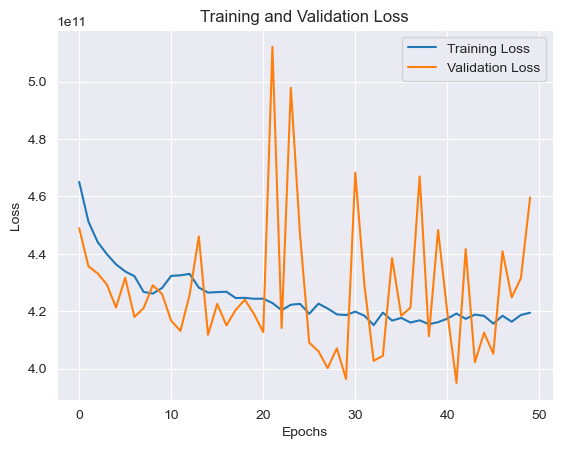

In [82]:
# Mostramos la pérdida
plt.plot(history_SGD.history['loss'], label='Training Loss')
plt.plot(history_SGD.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [83]:
# Creamos una nueva fila de resultados para KerasRegressor
new_row_SGD = pd.DataFrame({
    'R^2': [r2_SGD],
    'MSE': [mse_SGD],
    'RMSE': [rmse_SGD],
    'MAE': [mae_SGD]
}, index=['Keras Regressor 2'])

# Agregamos la nueva fila al dataframe df_results
df_LOF = pd.concat([df_LOF, new_row_SGD])
df_LOF

,R^2,MSE,RMSE,MAE
Linear Regression,0.354136,5.466358e+11,739348.219538,432313.210932
Ridge Regression,0.354136,5.466358e+11,739348.208813,432312.447279
Lasso Regression,0.354136,5.466357e+11,739348.189397,432312.836590
Decision Tree Regression,0.419601,4.912290e+11,700877.285234,296083.042989
Random Forest Regression,0.629022,3.139823e+11,560341.191904,248923.347214
Gradient Boosting Regression,0.635526,3.084776e+11,555407.615109,273777.953061
K-Neighbors Regression,0.497173,4.255744e+11,652360.671486,308784.213748
Neural Network Regression,0.390289,5.160373e+11,718357.368865,421213.757592
XGBoost Regression,0.685683,2.660262e+11,515777.245963,226917.412763
HistGradient Boosting Regression,0.693624,2.593057e+11,509220.701263,236263.635775


### <font color=#d42f33>Optimización de los mejores modelos

Tenemos dos modelos con valores disputados. Uno tiene mejor <b>R^2</b> y el otro, una <b>MAE</b> más reducida.

Cogemos los 3 modelos con <b>MAE</b> (error absoluto medio) más bajo y les aplicamos GridSearch.
Los valores de <b>R^2</b> han sido muy bajos, así que nos vamos a quedar con los que superan el 0.6. A ver lo que obtenemos.

#### <font color=#f0ba19>Visualización de los modelos

Tal como ya hemos comentado en los modelos de redes neuronales, nos quedamos con los resultados que proporciona <b>Local Outlier Factor</b>.

El modelo <b>Isolation Forest</b> nos da una MAE menor que el <b>Local Outlier Factor</b> y un coeficiente de correlación mayor, por lo que en principio nos deberíamos quedar con sus resultados, pero el que nos haga eliminar unos 50.000 registros frente a los 10.000 del otro nos hace decantarnos por el <b>Local Outlier Factor</b>.

Vamos a ver cómo se ven los modelos con <b>Local Outlier Factor</b>.

In [84]:
best_Keras_models = [
    ('Keras Regressor 1', Adam_best_model),
    ('Keras Regressor 2', SGD_best_model)
]

In [85]:
modelos = modelos + best_Keras_models

1003/1003 [==============================] - 2s 2ms/step


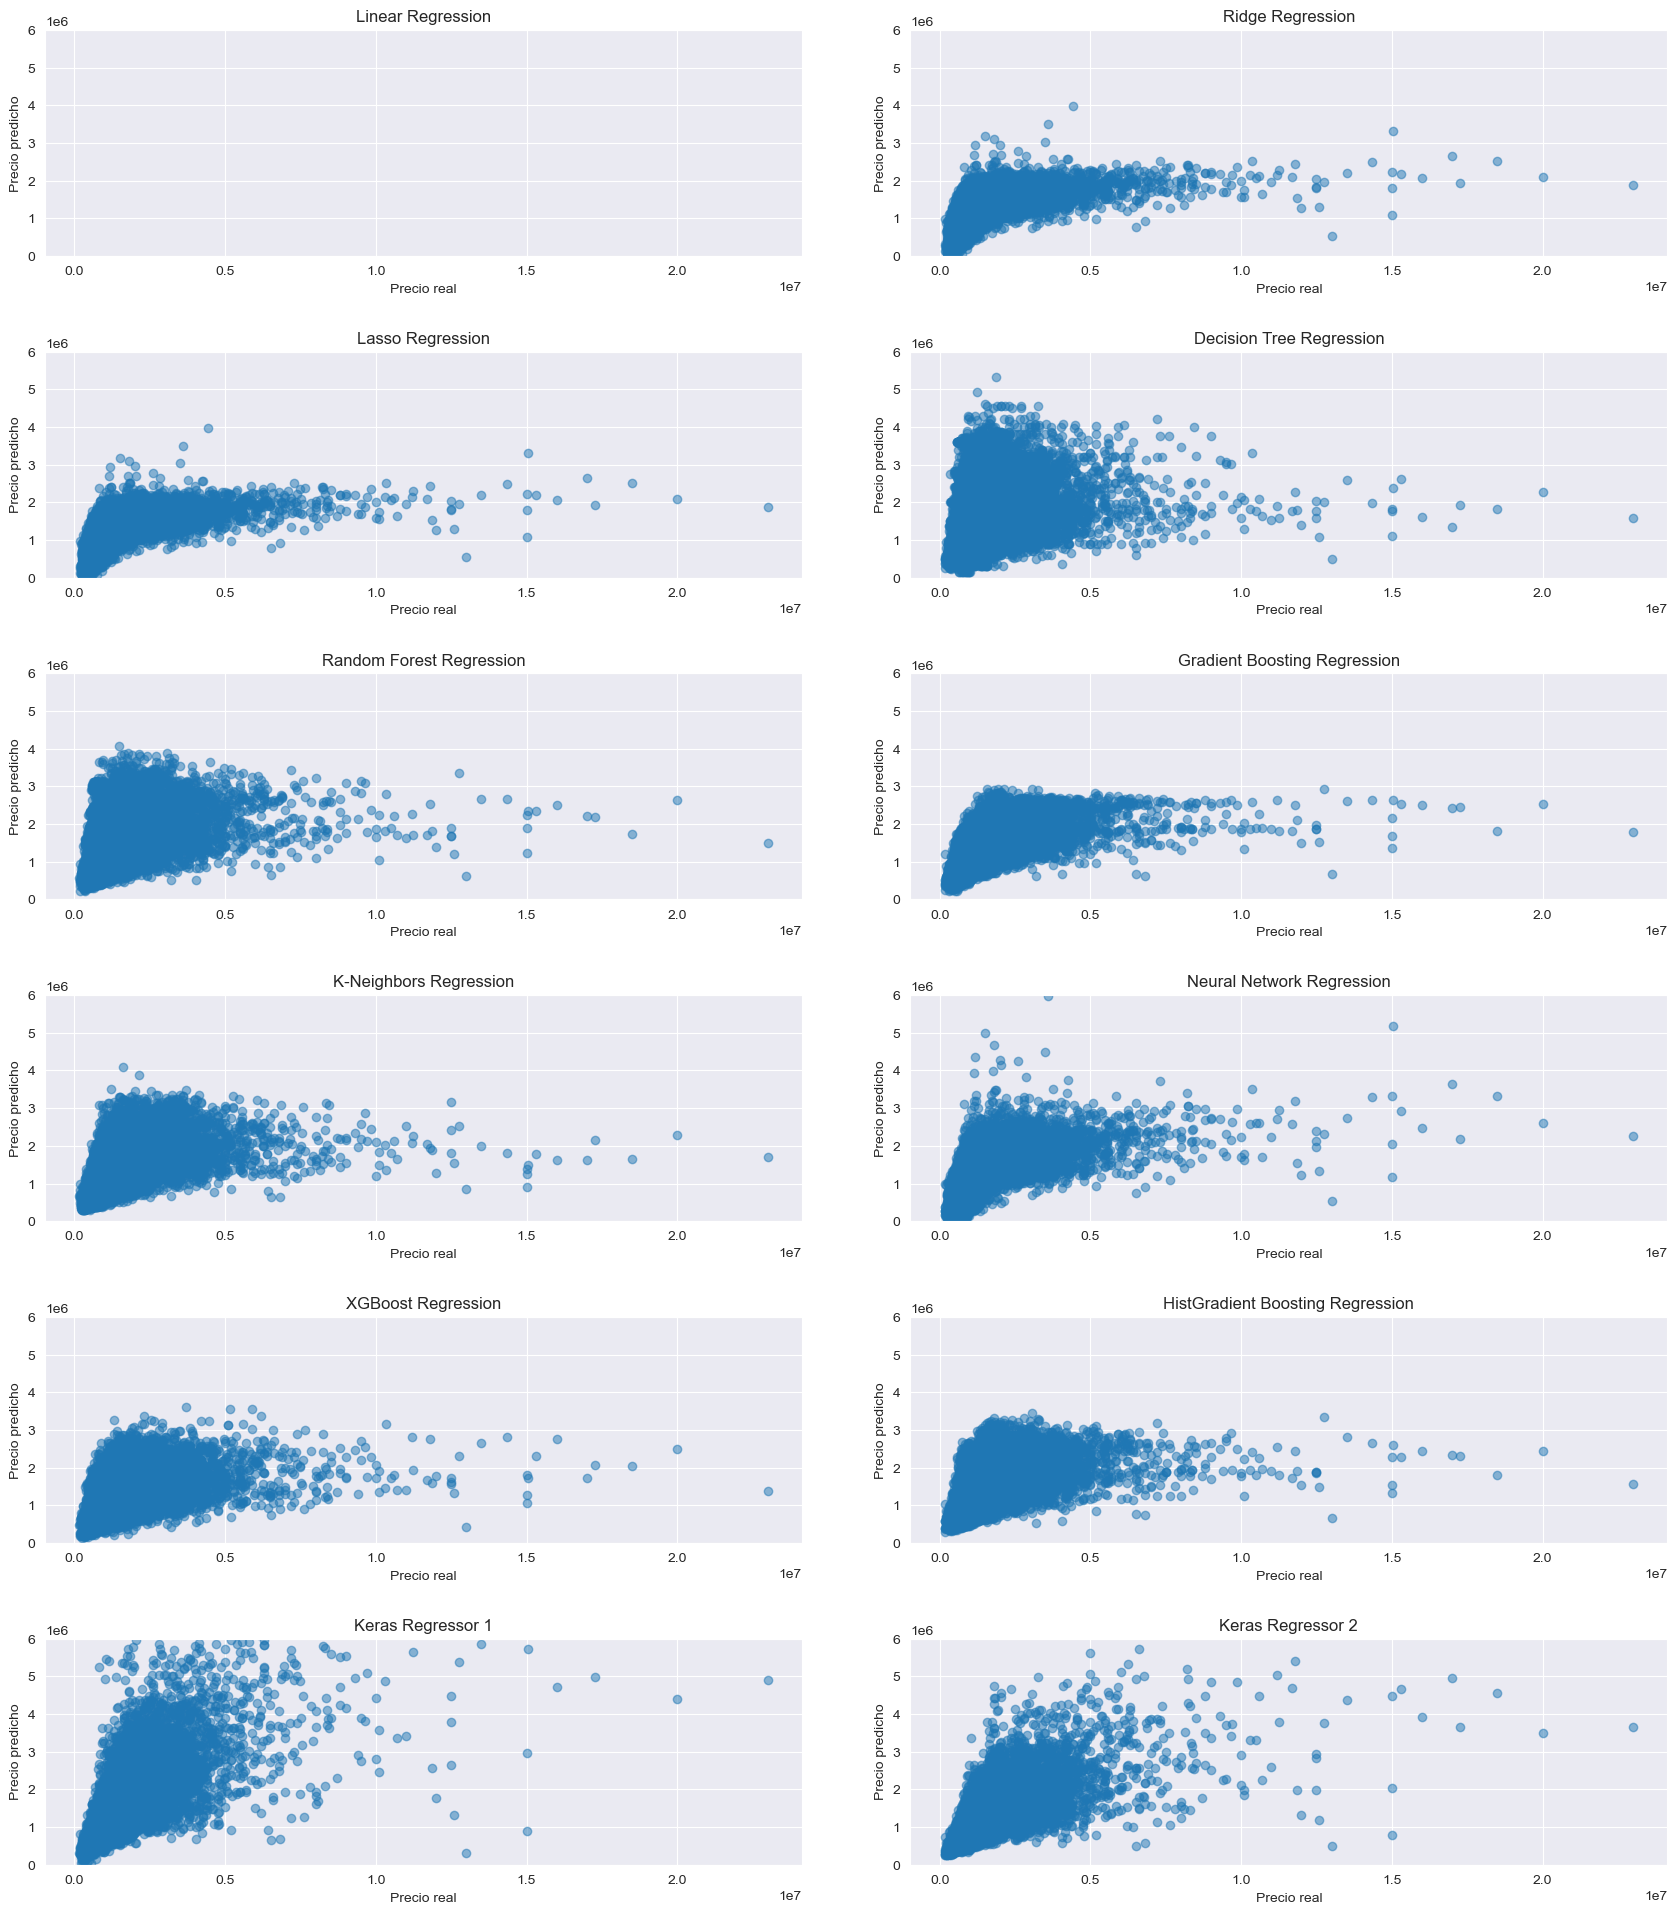

In [86]:
filas, columnas = 6, 2

# Creamos una figura con subtramas
fig, axs = plt.subplots(filas, columnas, figsize=(18, 20))
fig.tight_layout(pad=5.0)

# Iteramos a través de los modelos y creamos un gráfico de dispersión para cada uno
for idx, (nombre, modelo) in enumerate(modelos):
    fila_actual = idx // columnas
    columna_actual = idx % columnas
    ax = axs[fila_actual, columna_actual]

    # Calculamos las predicciones del modelo
    y_pred = modelo.predict(X_test_standardLOF)

    ax.scatter(y_testLOF, y_pred, alpha=0.5)
    ax.set_title(nombre)
    ax.set_xlabel('Precio real')
    ax.set_ylabel('Precio predicho')
    ax.grid(True)
    ax.set_ylim(0, 6000000)

plt.show()

#### <font color=#f0ba19>XGBoost Regressor

In [87]:
%%time

# Definimos el rango de valores para los hiperparámetros de XGBoost
param_grid_xgb = {
    'max_depth': [2, 3, 4],
    'n_estimators': [1000, 1100, 1200],
    'learning_rate': [0.13, 0.14, 0.15],
    'subsample': [0.9, 1.0, 1.1]
}

# Creamos el estimador
xgb_regressor = XGBRegressor()

# Configuramos la búsqueda de hiperparámetros con GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid_xgb, 
                               cv=5, n_jobs=-1, verbose=1, scoring='r2')

# Realizamos la búsqueda de hiperparámetros en los datos de entrenamiento y creamos el mejor modelo
grid_search_xgb.fit(X_train_standardLOF, y_trainLOF)
best_params_xgb = grid_search_xgb.best_params_
best_model_xgb = grid_search_xgb.best_estimator_

print("Mejores parámetros para XGBoost:", best_params_xgb)
print("El mejor modelo para XGBoost:", best_model_xgb)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mejores parámetros para XGBoost: {'learning_rate': 0.14, 'max_depth': 3, 'n_estimators': 1100, 'subsample': 1.0}
El mejor modelo para XGBoost: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.14, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
CPU times: user 27.1 s, sys: 8.24 s, total: 35.3 s


In [88]:
# Entrenamos el modelo XGBoost en el conjunto de entrenamiento
best_model_xgb.fit(X_train_standardLOF, y_trainLOF)

# Predecimos con el conjunto de prueba
y_pred_xgb = best_model_xgb.predict(X_test_standardLOF)

# Calculamos las métricas de evaluación en el conjunto de prueba
r2_test_xgb = r2_score(y_testLOF, y_pred_xgb)
mse_test_xgb = mean_squared_error(y_testLOF, y_pred_xgb)
rmse_test_xgb = np.sqrt(mse_test_xgb)
mae_test_xgb = mean_absolute_error(y_testLOF, y_pred_xgb)
print("R^2 en el conjunto de prueba (XGBoost):", r2_test_xgb)
print("MSE en el conjunto de prueba (XGBoost):", mse_test_xgb)
print("RMSE en el conjunto de prueba (XGBoost):", rmse_test_xgb)
print("MAE en el conjunto de prueba (XGBoost):", mae_test_xgb)

# Creamos una nueva fila de resultados para XGBoost
new_row_xgb = pd.DataFrame({
    'R^2': [r2_test_xgb],
    'MSE': [mse_test_xgb],
    'RMSE': [rmse_test_xgb],
    'MAE': [mae_test_xgb]
}, index=['Optimized XGBoost'])

# Agregamos la nueva fila al dataframe df_results
df_LOF = pd.concat([df_LOF, new_row_xgb])
df_LOF

R^2 en el conjunto de prueba (XGBoost): 0.6996130251068702
MSE en el conjunto de prueba (XGBoost): 254236656949.75113
RMSE en el conjunto de prueba (XGBoost): 504218.85818536294
MAE en el conjunto de prueba (XGBoost): 229114.08495007362


,R^2,MSE,RMSE,MAE
Linear Regression,0.354136,5.466358e+11,739348.219538,432313.210932
Ridge Regression,0.354136,5.466358e+11,739348.208813,432312.447279
Lasso Regression,0.354136,5.466357e+11,739348.189397,432312.836590
Decision Tree Regression,0.419601,4.912290e+11,700877.285234,296083.042989
Random Forest Regression,0.629022,3.139823e+11,560341.191904,248923.347214
Gradient Boosting Regression,0.635526,3.084776e+11,555407.615109,273777.953061
K-Neighbors Regression,0.497173,4.255744e+11,652360.671486,308784.213748
Neural Network Regression,0.390289,5.160373e+11,718357.368865,421213.757592
XGBoost Regression,0.685683,2.660262e+11,515777.245963,226917.412763
HistGradient Boosting Regression,0.693624,2.593057e+11,509220.701263,236263.635775


#### <font color=#f0ba19>HistGradientBoosting Regressor

In [89]:
%%time

# Definimos el rango de valores para los hiperparámetros de HistGradient Boosting
param_grid_hgb = {
    'max_iter': [200, 225, 250],
    'learning_rate': [0.12, 0.13, 0.14],
    'max_depth': [5, 6, 7],
    'min_samples_leaf': [8, 9, 10, 11],
    'l2_regularization': [0.005, 0.006, 0.007]
}

# Creamos el estimador
hgb_regressor = HistGradientBoostingRegressor()

# Configuramos la búsqueda de hiperparámetros con GridSearchCV
grid_search_hgb = GridSearchCV(estimator=hgb_regressor, param_grid=param_grid_hgb, cv=5, n_jobs=-1, verbose=1, scoring='r2')

# Realizamos la búsqueda de hiperparámetros en los datos de entrenamiento y creamos el mejor modelo
grid_search_hgb.fit(X_train_standardLOF, y_trainLOF)
best_params_hgb = grid_search_hgb.best_params_
best_model_hgb = grid_search_hgb.best_estimator_

print("Mejores parámetros para HistGradientBoostingRegressor:", best_params_hgb)
print("El mejor modelo para HistGradientBoostingRegressor:", best_model_hgb)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Mejores parámetros para HistGradientBoostingRegressor: {'l2_regularization': 0.006, 'learning_rate': 0.12, 'max_depth': 6, 'max_iter': 225, 'min_samples_leaf': 10}
El mejor modelo para HistGradientBoostingRegressor: HistGradientBoostingRegressor(l2_regularization=0.006, learning_rate=0.12,
                              max_depth=6, max_iter=225, min_samples_leaf=10)
CPU times: user 17.9 s, sys: 11 s, total: 28.9 s
Wall time: 14min 29s


In [90]:
#Entrenamos el modelo con el conjunto de entrenamiento
best_model_hgb.fit(X_train_standardLOF, y_trainLOF)

# Predecimos con el conjunto de prueba
y_pred_hgb = best_model_hgb.predict(X_test_standardLOF)

# Calculamos métricas
r2_test = r2_score(y_testLOF, y_pred_hgb)
mse_test = mean_squared_error(y_testLOF, y_pred_hgb)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_testLOF, y_pred_hgb)
print("R^2 en el conjunto de prueba:", r2_test)
print("MSE en el conjunto de prueba:", mse_test)
print("RMSE en el conjunto de prueba:", rmse_test)
print("MAE en el conjunto de prueba:", mae_test)

# Creamos una nueva fila de resultados
new_row = pd.DataFrame({
    'R^2': [r2_test],
    'MSE': [mse_test],
    'RMSE': [rmse_test],
    'MAE': [mae_test]
}, index=['Optimized HistGradientBoostingRegressor'])

# Agregamos la nueva fila al dataframe
df_LOF = pd.concat([df_LOF, new_row])
df_LOF

R^2 en el conjunto de prueba: 0.6941732389528755
MSE en el conjunto de prueba: 258840694947.0883
RMSE en el conjunto de prueba: 508763.8891932959
MAE en el conjunto de prueba: 227603.57719536734


,R^2,MSE,RMSE,MAE
Linear Regression,0.354136,5.466358e+11,739348.219538,432313.210932
Ridge Regression,0.354136,5.466358e+11,739348.208813,432312.447279
Lasso Regression,0.354136,5.466357e+11,739348.189397,432312.836590
Decision Tree Regression,0.419601,4.912290e+11,700877.285234,296083.042989
Random Forest Regression,0.629022,3.139823e+11,560341.191904,248923.347214
Gradient Boosting Regression,0.635526,3.084776e+11,555407.615109,273777.953061
K-Neighbors Regression,0.497173,4.255744e+11,652360.671486,308784.213748
Neural Network Regression,0.390289,5.160373e+11,718357.368865,421213.757592
XGBoost Regression,0.685683,2.660262e+11,515777.245963,226917.412763
HistGradient Boosting Regression,0.693624,2.593057e+11,509220.701263,236263.635775


#### <font color=#f0ba19>Visualización de todos los modelos

Ahora que tenemos los 2 modelos optimizados, los agrupamos y después los vamos a graficar, puesto que un gráfico siempre permite ver y comprender mejor los números.

In [91]:
# Definimos los modelos optimizados con los mejores hiperparámetros
opt_models = [
    ('Optimized HistGradientBoostingRegressor', best_model_hgb),
    ('Optimized XGBoost', best_model_xgb)
]

In [92]:
modelos = modelos + opt_models

1003/1003 [==============================] - 2s 2ms/step


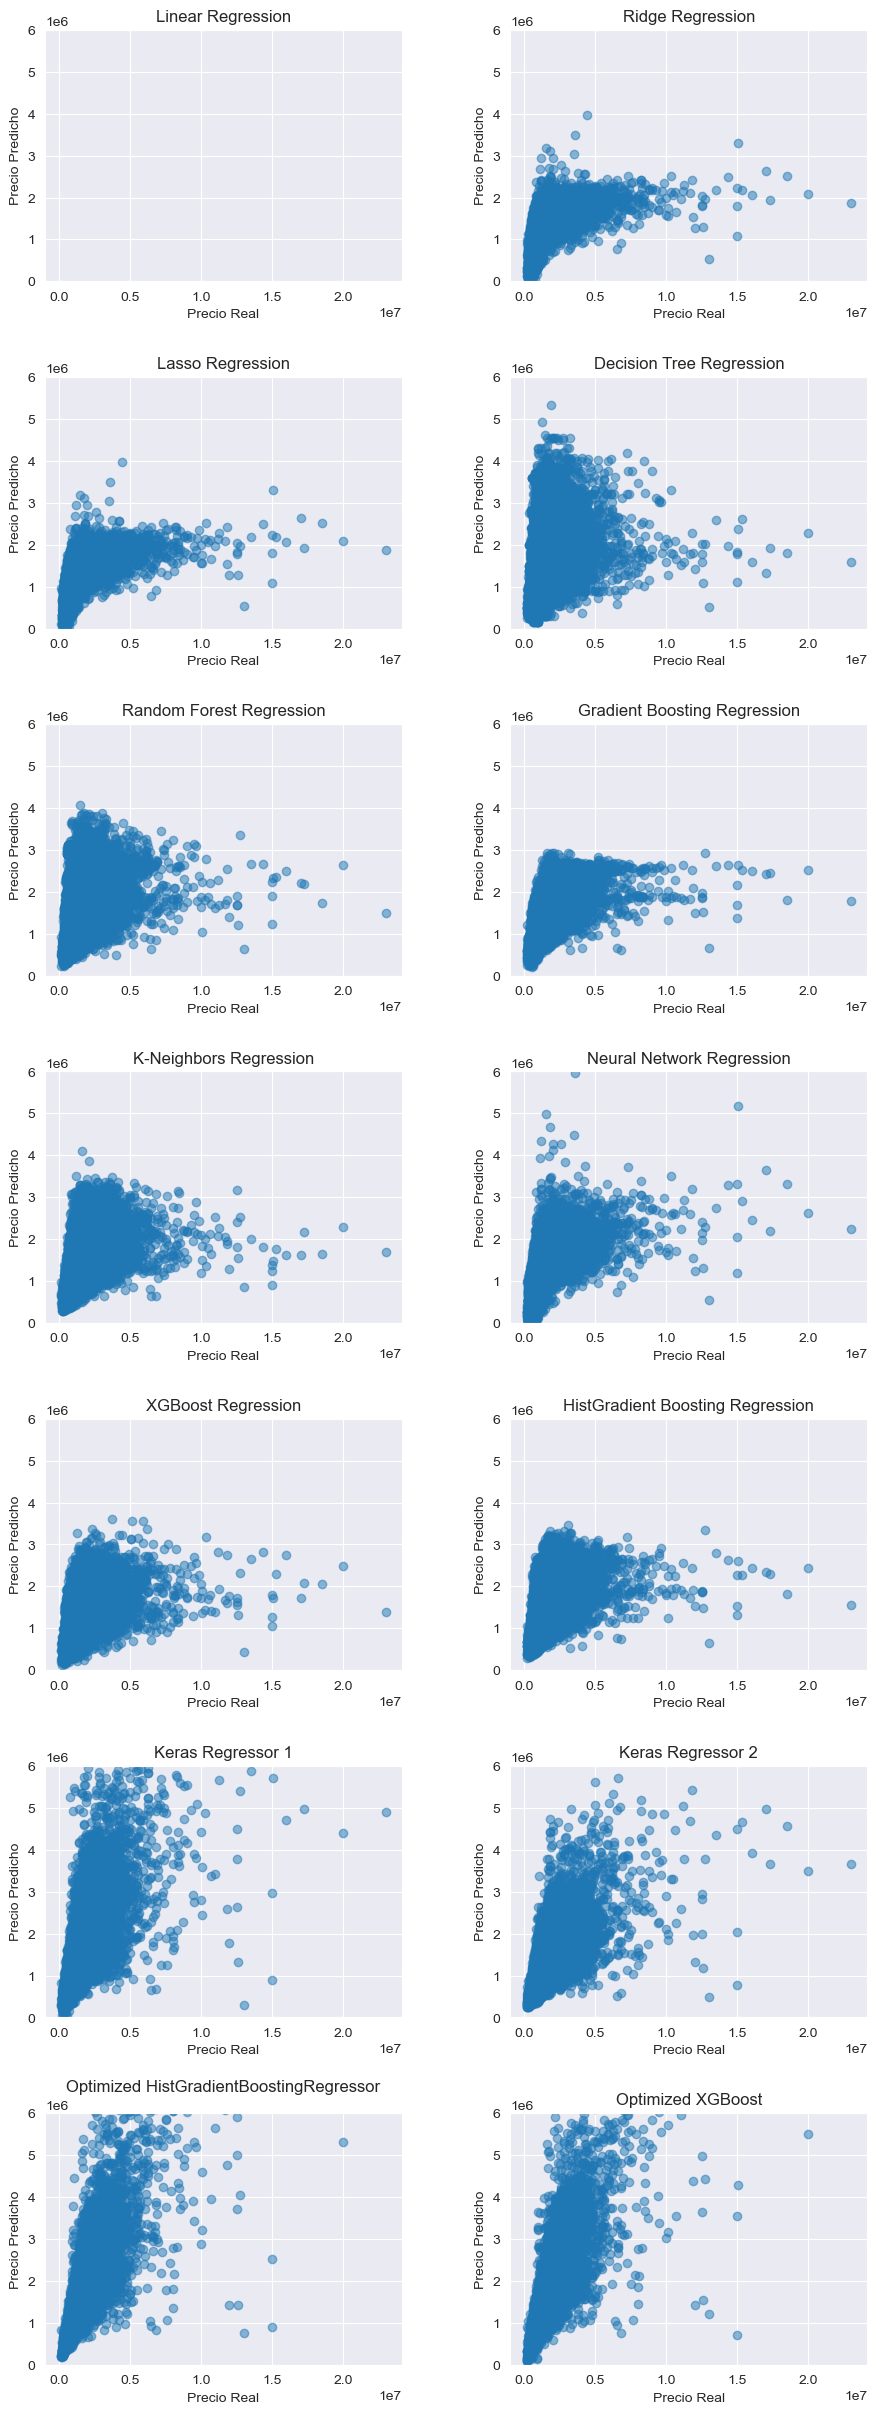

In [93]:
# Combinamos los modelos originales y los optimizados y los graficamos con los datos de validación
filas, columnas = 7, 2

fig, axs = plt.subplots(filas, columnas, figsize=(10, 25))
fig.tight_layout(pad=5.0)

for idx, (nombre, modelo) in enumerate(modelos):
    fila_actual = idx // columnas
    columna_actual = idx % columnas
    ax = axs[fila_actual, columna_actual]

    # Calculamos las predicciones del modelo
    y_pred = modelo.predict(X_test_standardLOF)

    ax.scatter(y_testLOF, y_pred, alpha=0.5)
    ax.set_title(nombre)
    ax.set_xlabel('Precio Real')
    ax.set_ylabel('Precio Predicho')
    ax.grid(True)
    ax.set_ylim(0, 6000000)

plt.show()

### <font color=#d42f33>Exportación de los modelos

In [94]:
%%time

# Carpeta donde vamos a guardar los pickles
carpeta = "Archivos_proyecto"

# Transformación del Ordinal Encoder
ruta_modelo = os.path.join(carpeta, 'encoder.pkl')
with open(ruta_modelo, 'wb') as file:
    pickle.dump(encoder, file)

# Transformación del OneHotEncoding
ruta_modelo = os.path.join(carpeta, 'df_viviendas.pkl')
with open(ruta_modelo, 'wb') as file:
    pickle.dump(dfv_dum, file)

# Normalización
ruta_modelo = os.path.join(carpeta, 'standard_scaler.pkl')
with open(ruta_modelo, 'wb') as file:
    pickle.dump(standard_scaler, file)

# Eliminación de outliers
ruta_modelo = os.path.join(carpeta, 'lof.pkl')
with open(ruta_modelo, 'wb') as file:
    pickle.dump(lof, file)

# Dataframe modificado
ruta_modelo = os.path.join(carpeta, 'dfv_LOF.pkl')
with open(ruta_modelo, 'wb') as file:
    pickle.dump(dfv_LOF, file)
    
# Datos de entrenamiento
ruta_modelo = os.path.join(carpeta, 'X_train_standardLOF.pkl')
with open(ruta_modelo, 'wb') as file:
    pickle.dump(X_train_standardLOF, file)
    
# Datos de prueba
ruta_modelo = os.path.join(carpeta, 'X_test_standardLOF.pkl')
with open(ruta_modelo, 'wb') as file:
    pickle.dump(X_test_standardLOF, file)

# Modelo Keras con optimizador Adam
Adam_best_model.fit(X_trainLOF, y_trainLOF)
ruta_modelo = os.path.join(carpeta, 'Adam_best_model.pkl')
with open(ruta_modelo, 'wb') as archivo:
    pickle.dump(Adam_best_model, archivo)

# Modelo Keras con optimizador SGD
SGD_best_model.fit(X_trainLOF, y_trainLOF)
ruta_modelo = os.path.join(carpeta, 'SGD_best_model.pkl')
with open(ruta_modelo, 'wb') as archivo:
    pickle.dump(SGD_best_model, archivo)

# Modelo Optimizado HistGradientBoostingRegressor
best_model_hgb.fit(X_trainLOF, y_trainLOF)
ruta_modelo = os.path.join(carpeta, 'best_model_hgb.pkl')
with open(ruta_modelo, 'wb') as archivo:
    pickle.dump(best_model_hgb, archivo)

# Modelo Optimizado XGBoost Regressor
best_model_xgb.fit(X_trainLOF, y_trainLOF)
ruta_modelo = os.path.join(carpeta, 'best_model_xgb.pkl')
with open(ruta_modelo, 'wb') as archivo:
    pickle.dump(best_model_xgb, archivo)

print("Los modelos se han entrenado y guardado correctamente en archivos separados.")

4012/4012 [==============================] - 17s 4ms/step - loss: 3852259295232.0000
INFO:tensorflow:Assets written to: ram://303f5204205344bdb57bddca441bc380/assets


INFO:tensorflow:Assets written to: ram://303f5204205344bdb57bddca441bc380/assets


4012/4012 [==============================] - 14s 3ms/step - loss: 1057817690112.0000
INFO:tensorflow:Assets written to: ram://f58fb72824d04bc3835df4a994fff896/assets


INFO:tensorflow:Assets written to: ram://f58fb72824d04bc3835df4a994fff896/assets


Los modelos se han entrenado y guardado correctamente en archivos separados.
CPU times: user 1min 23s, sys: 14.6 s, total: 1min 38s
Wall time: 51 s


## <font color=#252973>7. Interpretación del modelo</font><a name="interpretacion">

### <font color=#d42f33>Carga de los modelos

Cargamos los mejores modelo y lo enfrentamos.

In [95]:
# Ruta completa del archivo donde se guarda el modelo HistGradient Boosting
ruta_modelo = os.path.join(carpeta, 'best_model_hgb.pkl')

if os.path.exists(ruta_modelo):
    # Carga el modelo desde el archivo
    with open(ruta_modelo, 'rb') as archivo:
        modelo_linear = pickle.load(archivo)
    print("Modelo cargado correctamente.")
else:
    print(f"No se encontró el archivo del modelo en {ruta_modelo}.")

Modelo cargado correctamente.


In [96]:
# Ruta completa del archivo donde se guarda el modelo XGBoost
ruta_modelo = os.path.join(carpeta, 'best_model_xgb.pkl')

if os.path.exists(ruta_modelo):
    # Carga el modelo desde el archivo
    with open(ruta_modelo, 'rb') as archivo:
        modelo_linear = pickle.load(archivo)
    print("Modelo cargado correctamente.")
else:
    print(f"No se encontró el archivo del modelo en {ruta_modelo}.")

Modelo cargado correctamente.


### <font color=#d42f33>Predicciones real vs predicho

Vamos a crear modelos y mostrar reeultados con HistGradientBoosting y con XGBoost.

#### <font color=#f0ba19>HistGradientBoosting Regressor

In [97]:
# Hacemos predicciones en los datos de validación con el mejor modelo
y_val_hgb = best_model_hgb.predict(X_validLOF)

# Calculamos métricas en los datos de validación
r2_hgb = r2_score(y_validLOF, y_val_hgb)
mse_hgb = mean_squared_error(y_validLOF, y_val_hgb)
rmse_hgb = mean_squared_error(y_validLOF, y_val_hgb, squared=False)
mae_hgb = mean_absolute_error(y_validLOF, y_val_hgb)
print("Métricas en el conjunto de validación:")
print(f"R^2 en el conjunto de validación: {r2_hgb:.6f}")
print(f"MSE en el conjunto de validación: {mse_hgb:.6f}")
print(f"RMSE en el conjunto de validación: {rmse_hgb:.6f}")
print(f"MAE en el conjunto de validación: {mae_hgb:.6f}")

Métricas en el conjunto de validación:
R^2 en el conjunto de validación: 0.711950
MSE en el conjunto de validación: 244467767219.910431
RMSE en el conjunto de validación: 494436.818228
MAE en el conjunto de validación: 228921.259934


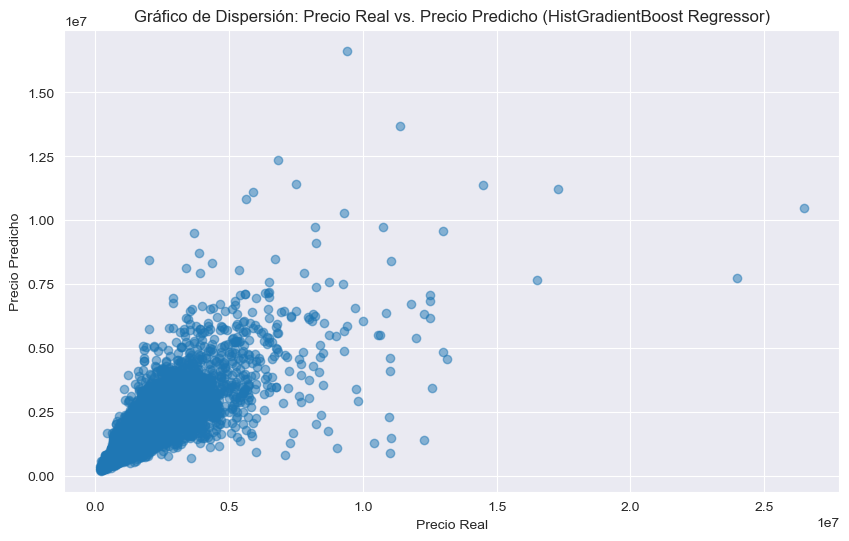

In [98]:
# Creamos un gráfico de dispersión real vs. predicho
plt.figure(figsize=(10, 6))
plt.scatter(y_validLOF, y_val_hgb, alpha=0.5)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Gráfico de Dispersión: Precio Real vs. Precio Predicho (HistGradientBoost Regressor)")
plt.grid(True)
plt.show()

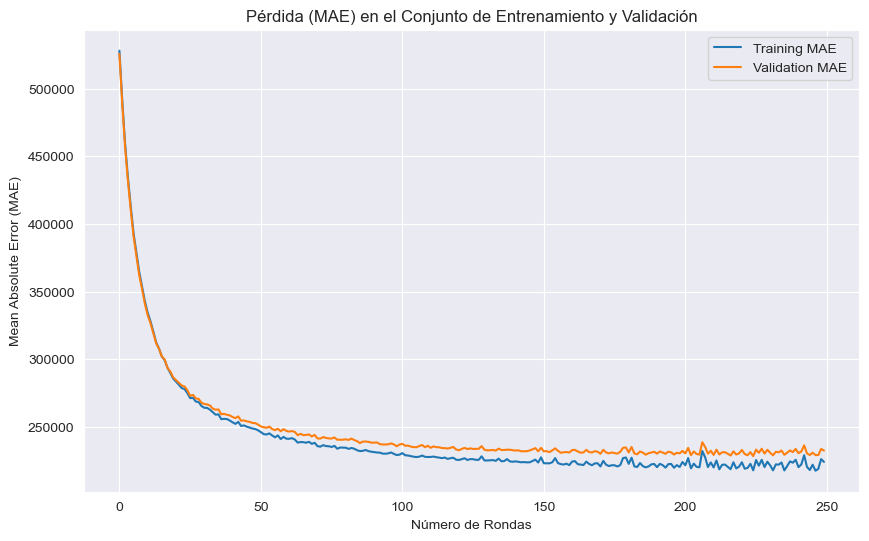

In [99]:
# Entrenamiento del modelo
train_errors = []
val_errors = []
for i in range(1, 251):
    best_model_hgb.set_params(max_iter=i)
    best_model_hgb.fit(X_trainLOF, y_trainLOF)
    train_pred = best_model_hgb.predict(X_trainLOF)
    train_mae = np.mean(np.abs(train_pred - y_trainLOF))
    train_errors.append(train_mae)
    val_pred = best_model_hgb.predict(X_validLOF)
    val_mae = np.mean(np.abs(val_pred - y_validLOF))
    val_errors.append(val_mae)

plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Training MAE')
plt.plot(val_errors, label='Validation MAE')
plt.xlabel('Número de Rondas')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Pérdida (MAE) en el Conjunto de Entrenamiento y Validación')
plt.legend()
plt.grid(True)
plt.show()

In [100]:
# Creamos una copia del dataframe de datos de validación
valid_data_with_predictionsHGB = valid_dataLOF.copy()

# Agregamos las predicciones como una nueva columna en el dataframe
valid_data_with_predictionsHGB['Predicciones'] = y_val_hgb

# Calculamos el error absoluto entre las predicciones y los valores reales
valid_data_with_predictionsHGB['Error Absoluto'] = abs(valid_data_with_predictionsHGB['sellPrice'] - valid_data_with_predictionsHGB['Predicciones'])

# Ordenamos el dataframe por el error absoluto de manera descendente para ver los casos más extremos primero
valid_data_with_predictionsHGB = valid_data_with_predictionsHGB.sort_values(by='Error Absoluto', ascending=False)

# Mostramos los 10 casos más extremos
casos_extremosHGB = valid_data_with_predictionsHGB.head(10)
casos_extremosHGB

,sellPrice,Date,propType,postalCode,suburb,bed,bath,car,Year,propType-encoded,Season_autumn,Season_spring,Season_summer,Season_winter,Predicciones,Error Absoluto
127888,24000000,2015-07-31,house,2030,Vaucluse,6,5,6,2015,3.0,0,0,0,1,7.743127e+06,1.625687e+07
127727,26500000,2017-06-22,house,2030,Vaucluse,7,8,9,2017,3.0,0,0,0,1,1.047837e+07,1.602163e+07
70367,12300000,2016-04-04,house,2035,Maroubra,2,1,2,2016,3.0,1,0,0,0,1.385274e+06,1.091473e+07
11964,11000000,2013-05-08,house,2223,Oatley,4,1,2,2013,3.0,1,0,0,0,8.901738e+05,1.010983e+07
109902,11050000,2010-10-06,house,2074,Turramurra,6,3,2,2010,3.0,0,1,0,0,1.472099e+06,9.577901e+06
148779,12600000,2018-11-26,house,2063,Northbridge,4,3,2,2018,3.0,0,1,0,0,3.422752e+06,9.177248e+06
151930,10430500,2014-12-23,house,2140,Homebush,3,1,1,2014,3.0,0,0,1,0,1.290624e+06,9.139876e+06
32464,16500000,2016-03-01,house,2090,Cremorne,7,7,3,2016,3.0,1,0,0,0,7.649373e+06,8.850627e+06
14896,10980000,2015-05-21,house,2104,Bayview,5,4,2,2015,3.0,1,0,0,0,2.280801e+06,8.699199e+06
74985,13150000,2015-11-27,house,2062,Cammeray,5,6,3,2015,3.0,0,1,0,0,4.577336e+06,8.572664e+06


In [101]:
# Obtenemos los 10 casos con los errores absolutos más bajos (las mejores predicciones)
casos_mejoresHGB = valid_data_with_predictionsHGB.tail(10)
casos_mejoresHGB

,sellPrice,Date,propType,postalCode,suburb,bed,bath,car,Year,propType-encoded,Season_autumn,Season_spring,Season_summer,Season_winter,Predicciones,Error Absoluto
34330,1350000,2016-10-07,house,2154,Castle Hill,4,2,4,2016,3.0,0,1,0,0,1.349934e+06,65.658468
162865,760000,2014-03-27,house,2044,Tempe,2,1,2,2014,3.0,1,0,0,0,7.600609e+05,60.935428
182223,520000,2019-03-14,house,2760,Colyton,3,1,1,2019,3.0,1,0,0,0,5.199555e+05,44.534884
96306,610000,2013-04-02,townhouse,2113,Macquarie Park,2,1,1,2013,1.0,1,0,0,0,6.099558e+05,44.246204
78789,1195000,2016-04-09,duplex/semi-detached,2136,Strathfield South,2,2,4,2016,2.0,1,0,0,0,1.194960e+06,39.661884
138586,838000,2017-02-20,villa,2219,Sans Souci,2,1,1,2017,0.0,0,0,1,0,8.379626e+05,37.422027
78298,1370000,2015-04-08,house,2049,Petersham,3,1,1,2015,3.0,1,0,0,0,1.369966e+06,33.895565
31544,680000,2015-11-30,house,2557,Gregory Hills,3,2,2,2015,3.0,0,1,0,0,6.799721e+05,27.859116
196067,1322000,2013-08-19,house,2093,North Balgowlah,3,2,2,2013,3.0,0,0,0,1,1.322005e+06,5.184373
169484,385000,2011-04-19,house,2167,Glenfield,3,1,3,2011,3.0,1,0,0,0,3.850018e+05,1.771333


In [102]:
subset_dfHGB = valid_data_with_predictionsHGB[['postalCode', 'sellPrice', 'Predicciones', 'Error Absoluto']]
subset_dfHGB.sort_values(by="Error Absoluto", ascending=True).head(10)

,postalCode,sellPrice,Predicciones,Error Absoluto
169484,2167,385000,3.850018e+05,1.771333
196067,2093,1322000,1.322005e+06,5.184373
31544,2557,680000,6.799721e+05,27.859116
78298,2049,1370000,1.369966e+06,33.895565
138586,2219,838000,8.379626e+05,37.422027
78789,2136,1195000,1.194960e+06,39.661884
96306,2113,610000,6.099558e+05,44.246204
182223,2760,520000,5.199555e+05,44.534884
162865,2044,760000,7.600609e+05,60.935428
34330,2154,1350000,1.349934e+06,65.658468


#### <font color=#f0ba19>XGBoost Regressor

Hacemos lo mismo con XGBoost, pero con alguna diferencia en cuanto a la pérdida, porque los modelos difieren en la forma de trabajar.

In [103]:
# Hacemos predicciones en los datos de validación con el mejor modelo
y_val_xgb = best_model_xgb.predict(X_validLOF)

# Calculamos métricas en los datos de validación
r2_xgb = r2_score(y_validLOF, y_val_xgb)
mse_xgb = mean_squared_error(y_validLOF, y_val_xgb)
rmse_xgb = mean_squared_error(y_validLOF, y_val_xgb, squared=False)
mae_xgb = mean_absolute_error(y_validLOF, y_val_xgb)
print("Métricas en el conjunto de validación:")
print(f"R^2 en el conjunto de validación: {r2_xgb:.6f}")
print(f"MSE en el conjunto de validación: {mse_xgb:.6f}")
print(f"RMSE en el conjunto de validación: {rmse_xgb:.6f}")
print(f"MAE en el conjunto de validación: {mae_xgb:.6f}")

Métricas en el conjunto de validación:
R^2 en el conjunto de validación: 0.720629
MSE en el conjunto de validación: 237102585986.157776
RMSE en el conjunto de validación: 486931.808353
MAE en el conjunto de validación: 230139.636689


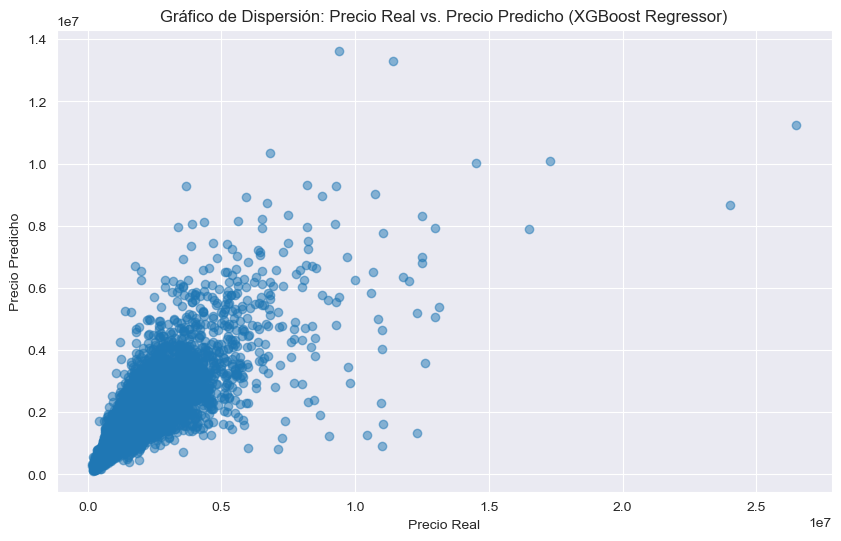

In [104]:
# Creamos un gráfico de dispersión real vs. predicho
plt.figure(figsize=(10, 6))
plt.scatter(y_validLOF, y_val_xgb, alpha=0.5)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Gráfico de Dispersión: Precio Real vs. Precio Predicho (XGBoost Regressor)")
plt.grid(True)
plt.show()

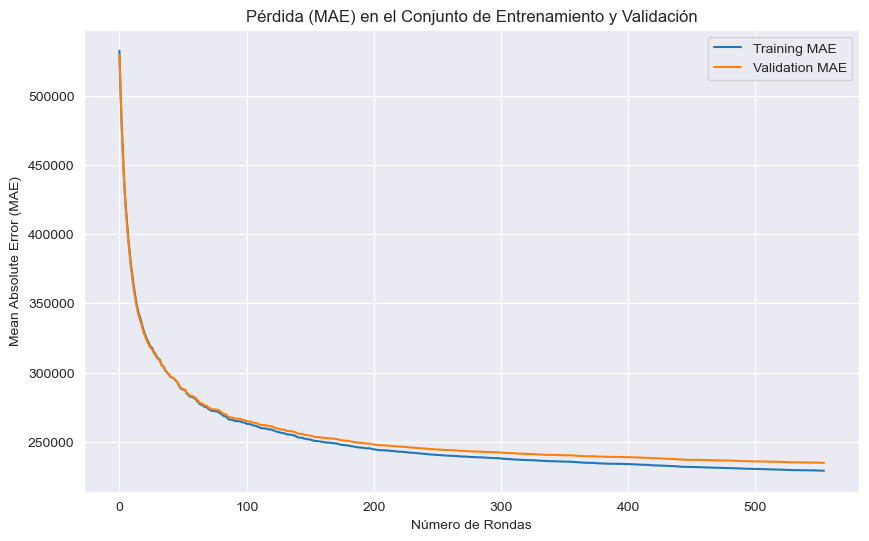

In [113]:
# Entrenamos el modelo con el conjunto de entrenamiento y habilitamos early stopping con el conjunto de validación
evals = [(X_trainLOF, y_trainLOF), (X_validLOF, y_validLOF)]  

best_model_xgb.fit(
    X_trainLOF, y_trainLOF,
    eval_metric=["mae", "rmse"],  
    eval_set=evals,
    early_stopping_rounds=10,     
    verbose=False)


# Trazamos la pérdida (MAE) en el conjunto de entrenamiento y validación
results = best_model_xgb.evals_result()
train_mae = results['validation_0']['mae']
val_mae = results['validation_1']['mae']

plt.figure(figsize=(10, 6))
plt.plot(train_mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Número de Rondas')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Pérdida (MAE) en el Conjunto de Entrenamiento y Validación')
plt.legend()
plt.grid(True)
plt.show()

In [106]:
# Creamos una copia del dataframe de datos de validación
valid_data_with_predictionsXGB = valid_dataLOF.copy()

# Agregamos las predicciones como una nueva columna en el dataframe
valid_data_with_predictionsXGB['Predicciones'] = y_val_xgb

# Calculamos el error absoluto entre las predicciones y los valores reales
valid_data_with_predictionsXGB['Error Absoluto'] = abs(valid_data_with_predictionsXGB['sellPrice'] - valid_data_with_predictionsXGB['Predicciones'])

# Ordenamos el dataframe por el error absoluto de manera descendente para ver los casos más extremos primero
valid_data_with_predictionsXGB = valid_data_with_predictionsXGB.sort_values(by='Error Absoluto', ascending=False)

# Mostramos los 10 casos más extremos
casos_extremosXGB = valid_data_with_predictionsXGB.head(10)
casos_extremosXGB

,sellPrice,Date,propType,postalCode,suburb,bed,bath,car,Year,propType-encoded,Season_autumn,Season_spring,Season_summer,Season_winter,Predicciones,Error Absoluto
127888,24000000,2015-07-31,house,2030,Vaucluse,6,5,6,2015,3.0,0,0,0,1,8.663406e+06,1.533659e+07
127727,26500000,2017-06-22,house,2030,Vaucluse,7,8,9,2017,3.0,0,0,0,1,1.125072e+07,1.524928e+07
70367,12300000,2016-04-04,house,2035,Maroubra,2,1,2,2016,3.0,1,0,0,0,1.337431e+06,1.096257e+07
11964,11000000,2013-05-08,house,2223,Oatley,4,1,2,2013,3.0,1,0,0,0,9.176354e+05,1.008236e+07
109902,11050000,2010-10-06,house,2074,Turramurra,6,3,2,2010,3.0,0,1,0,0,1.627064e+06,9.422936e+06
151930,10430500,2014-12-23,house,2140,Homebush,3,1,1,2014,3.0,0,0,1,0,1.273745e+06,9.156755e+06
148779,12600000,2018-11-26,house,2063,Northbridge,4,3,2,2018,3.0,0,1,0,0,3.593244e+06,9.006756e+06
14896,10980000,2015-05-21,house,2104,Bayview,5,4,2,2015,3.0,1,0,0,0,2.309807e+06,8.670193e+06
32464,16500000,2016-03-01,house,2090,Cremorne,7,7,3,2016,3.0,1,0,0,0,7.901814e+06,8.598186e+06
146465,13000000,2016-04-08,terrace,2011,Potts Point,4,5,2,2016,5.0,1,0,0,0,5.057102e+06,7.942898e+06


In [107]:
# Obtenemos los 10 casos con los errores absolutos más bajos (las mejores predicciones)
casos_mejoresXGB = valid_data_with_predictionsXGB.tail(10)
casos_mejoresXGB

,sellPrice,Date,propType,postalCode,suburb,bed,bath,car,Year,propType-encoded,Season_autumn,Season_spring,Season_summer,Season_winter,Predicciones,Error Absoluto
49612,950000,2017-06-21,house,2145,Wentworthville,3,2,1,2017,3.0,0,0,0,1,9.499259e+05,74.12500
48497,511000,2012-05-31,house,2177,Bonnyrigg Heights,4,2,2,2012,3.0,1,0,0,0,5.110724e+05,72.40625
150319,535000,2016-11-02,townhouse,2750,Penrith,3,2,1,2016,1.0,0,1,0,0,5.349363e+05,63.68750
21750,1020000,2011-04-11,house,2075,St Ives,4,2,2,2011,3.0,1,0,0,0,1.019949e+06,50.62500
6464,465000,2015-03-16,house,2558,Eagle Vale,3,1,1,2015,3.0,1,0,0,0,4.650413e+05,41.28125
116690,760000,2015-02-20,house,2768,Stanhope Gardens,3,2,2,2015,3.0,0,0,1,0,7.599664e+05,33.56250
161566,1076000,2012-04-28,house,2111,Gladesville,3,1,1,2012,3.0,1,0,0,0,1.075967e+06,33.37500
197780,500000,2019-02-18,house,2560,Ambarvale,3,1,2,2019,3.0,0,0,1,0,4.999674e+05,32.59375
158938,985000,2018-06-27,house,2213,Panania,3,2,1,2018,3.0,0,0,0,1,9.850174e+05,17.37500
183288,735000,2016-10-21,house,2760,Ropes Crossing,4,2,2,2016,3.0,0,1,0,0,7.350082e+05,8.18750


In [108]:
subset_dfXGB = valid_data_with_predictionsXGB[['postalCode', 'sellPrice', 'Predicciones', 'Error Absoluto']]
subset_dfXGB.sort_values(by="Error Absoluto", ascending=True).head(10)

,postalCode,sellPrice,Predicciones,Error Absoluto
183288,2760,735000,7.350082e+05,8.18750
158938,2213,985000,9.850174e+05,17.37500
197780,2560,500000,4.999674e+05,32.59375
161566,2111,1076000,1.075967e+06,33.37500
116690,2768,760000,7.599664e+05,33.56250
6464,2558,465000,4.650413e+05,41.28125
21750,2075,1020000,1.019949e+06,50.62500
150319,2750,535000,5.349363e+05,63.68750
48497,2177,511000,5.110724e+05,72.40625
49612,2145,950000,9.499259e+05,74.12500


### <font color=#d42f33>Conclusiones

El principal problema con el que nos encontramos a la hora de trabajar este dataset es que adolece de una de las principales variables que podríamos suponer que se toman en cuenta la hora de comprar una vivienda o un local, como los almacenes, que es la cantidad de superficie de que dispone cada vivienda o local.

Es claro que a la hora de comprar una vivienda se tienen muchas variables en cuenta, como es la ubicación (y lo comprobamos viendo cómo el código postal influye en sentido contrario al precio; cuanto más cerca del centro, más alta la probabilidad de que el precio se incremente).

Pero la superficie es una variable fundamental. Y lo podemos ver cómo se ve reflejado, por ejemplo de manera indirecta, en el número de cuartos de baño. Y de hecho su correlación es mayor que el de habitaciones. A fin de cuentas en una vivienda puede haber muchas habitaciones, siendo esta pequeña, pero lo que no abundarán serán los cuartos de baño. Esto es algo que, como ya se ha comentado, se pudo ver en otrs trabajos relacionados con ello.

Aun así el modelo que hemos obtenido tiene una correlación bastante alta, del <b>70%</b>, pero por desgracia hay bastante dispersión entre lo que predice el modelo y lo que da como resultado. hemos puesto en la graficación los modelos que mejor correlación obtenían, para ver posibles divergencias, pero son francamente similares.

Lo que sí hay que reseñar es que el coeficiente de correlación con los datos de validación es muy similar o incluso superior a los de entrenamiento y prueba.

## <font color=#252973>8. Visualización del modelo</font><a name="visualizacion">

Este modelo lo vamos a ver en una página web fuera del propio entorno de Jupyter, además de colgarlo en una página web.

El repositorio de la información será GitHub y la página la crearemos con Streamlit.

### <font color=#d42f33>GitHub

Para poder desarroolar el proyecto en GitHub vamos a elaborar un archivo con los requisitos que se requieren.

In [112]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


https://github.com/JDuchmnt/SyndeyMarket

### <font color=#d42f33>Streamlit

Vinculamos la cuenta de GitHub con la de Streamlit y colgamos el proyecto en la app para que sea accesible.

https://syndeymarket-proyect.streamlit.app